#### Evaluation Project 1 Baseball Case Study
Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


# By: Udit Lakhoria

Batch: 0722

. Importing the necessary libraries for doing data cleansing, data wrangling, and EDA.

In [1]:
import pandas as pd # for Data Wrangling Application
import numpy as np # For Basic computation 
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # For ploting 
%matplotlib inline
import warnings # For Filtering warnings
warnings.filterwarnings('ignore')

# Importing CSV File of Baseball Case study

In [2]:
dataf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
dataf.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [4]:
dataf.tail()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
25  92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26  84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27  79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28  74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29  68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV   E  
25   21  47  75  
26   18  41  78  
27   12  44  86  
28    6  41  92  
29    4  36  95

Examining the dataset 

In [5]:
dataf.shape

(30, 17)

Dataset contains 30 rows and 17 columns

# Observation
The 'W' (wins) is the target variable in this dataset and it has 16 features which summarises baseball players' statistical data. This variable predicts the number of wins.
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games, and Errors are the input features in this dataset.
Target Variable: Predicted number of wins (W)


In [7]:
dataf.columns #To find out the number of Columns present in the dataset

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

*Our data contains column names that are difficult to grasp and will need to be translated into a format that is more comprehensible. I'll use baseball statistics lingo I found online in oder to comprehend the various columns in the dataset.

# Let's Understand them Holistically


*W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work

*RA – Run average: number of runs allowed times nine divided by innings pitched

*ER – Earned run: number of runs that did not occur as a result of errors or passed balls

*ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

*CG – Complete game: number of games where player was the only pitcher for their team

*SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score.

*SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

*SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. 

*R – Runs scored: times reached home plate legally and safely

*AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction. The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out.

*H – Hit: reaching base because of a batted, fair ball without error by the defense

*2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

*3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

*HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

*BB – Base on balls: hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.

*K – Strike out: number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. 

*E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.






# Now let's Rename these Column names for easy understanding

In [9]:
dataf.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Runs Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [11]:
dataf.tail()

Wins  Runs  At Bat  Hits  Doubles  Triples  Home Runs  Base on Balls  \
25    92   667    5385  1346      263       26        187            563   
26    84   696    5565  1486      288       39        136            457   
27    79   720    5649  1494      289       48        154            490   
28    74   650    5457  1324      260       36        148            426   
29    68   737    5572  1479      274       49        186            388   

    Strike Outs  Stolen Base  Runs Average  Earned Runs  Earned Runs Average  \
25         1258           59           595          553                 3.44   
26         1159           93           627          597                 3.72   
27         1312          132           713          659                 4.04   
28         1327           82           731          655                 4.09   
29         1283           97           844          799                 5.04   

    Complete Game  Shut Outs  Saves  Errors  
25              6         21     47      75  
26              7         18     41      78  
27              1         12     44      86  
28              1          6     41      92  
29              4          4     36      95

# Column names are now at par with our Understanding

In [13]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wins                 30 non-null     int64  
 1   Runs                 30 non-null     int64  
 2   At Bat               30 non-null     int64  
 3   Hits                 30 non-null     int64  
 4   Doubles              30 non-null     int64  
 5   Triples              30 non-null     int64  
 6   Home Runs            30 non-null     int64  
 7   Base on Balls        30 non-null     int64  
 8   Strike Outs          30 non-null     int64  
 9   Stolen Base          30 non-null     int64  
 10  Runs Average         30 non-null     int64  
 11  Earned Runs          30 non-null     int64  
 12  Earned Runs Average  30 non-null     float64
 13  Complete Game        30 non-null     int64  
 14  Shut Outs            30 non-null     int64  
 15  Saves                30 non-null     int64

# Observation
##We can observe that no column in this data collection has category information; all of the values are numerical.
##Regression analysis may be performed on this dataset.


# Now Let's Perform Statistical Analysis on the Data set

<AxesSubplot:>

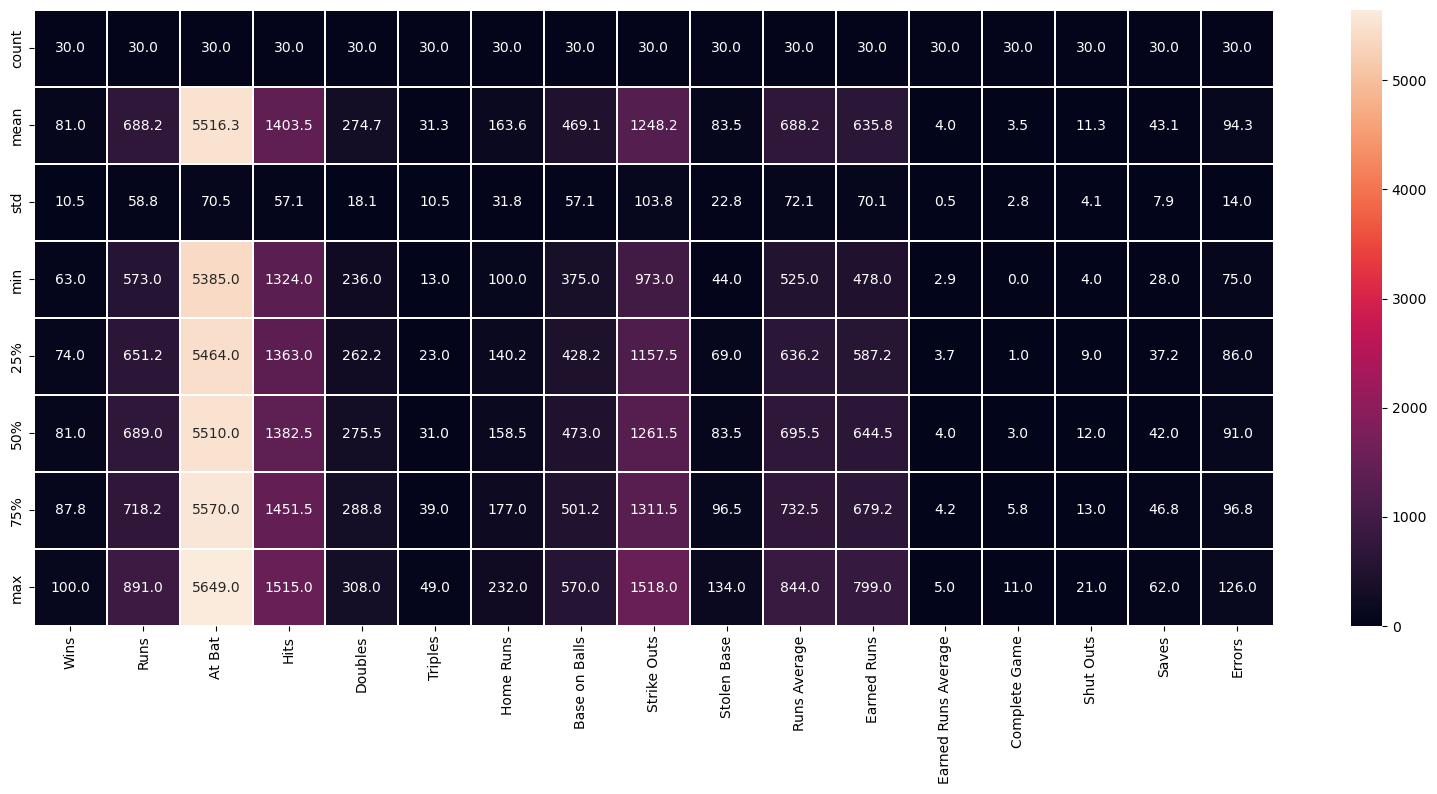

In [15]:
# Visualizing the statistics of the columns by utilising heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(dataf.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [19]:
dataf.describe()

Wins        Runs       At Bat         Hits     Doubles  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

         Triples   Home Runs  Base on Balls  Strike Outs  Stolen Base  \
count  30.000000   30.000000      30.000000     30.00000    30.000000   
mean   31.300000  163.633333     469.100000   1248.20000    83.500000   
std    10.452355   31.823309      57.053725    103.75947    22.815225   
min    13.000000  100.000000     375.000000    973.00000    44.000000   
25%    23.000000  140.250000     428.250000   1157.50000    69.000000   
50%    31.000000  158.500000     473.000000   1261.50000    83.500000   
75%    39.000000  177.000000     501.250000   1311.50000    96.500000   
max    49.000000  232.000000     570.000000   1518.00000   134.000000   

       Runs Average  Earned Runs  Earned Runs Average  Complete Game  \
count     30.000000    30.000000            30.000000      30.000000   
mean     688.233333   635.833333             3.956333       3.466667   
std       72.108005    70.140786             0.454089       2.763473   
min      525.000000   478.000000             2.940000       0.000000   
25%      636.250000   587.250000             3.682500       1.000000   
50%      695.500000   644.500000             4.025000       3.000000   
75%      732.500000   679.250000             4.220000       5.750000   
max      844.000000   799.000000             5.040000      11.000000   

       Shut Outs      Saves      Errors  
count  30.000000  30.000000   30.000000  
mean   11.300000  43.066667   94.333333  
std     4.120177   7.869335   13.958889  
min     4.000000  28.000000   75.000000  
25%     9.000000  37.250000   86.000000  
50%    12.000000  42.000000   91.000000  
75%    13.000000  46.750000   96.750000  
max    21.000000  62.000000  126.000000

# Observation
*For the majority of features, the data has noticeably right skew if we only look at the mean and 50% columns.
*For each variable, the count is the same.
*Errors, shutouts, and run scored at 75% and maximum numbers indicate the possibility of potential outliers.
*Overall, all statistical parameters, from mean to maximum, reveal that the characteristics appear to be developing clearly with  no obvious irregularities.
*Heatmap makes it evident that while creating an ML model, data must be scaled.

Let's check out the missing values present in the data set

In [21]:
miss_val = dataf.isnull().sum().sort_values(ascending = False)
print(pd.concat([miss_val], axis =1, keys =['Missing Values']))

                     Missing Values
Wins                              0
Stolen Base                       0
Saves                             0
Shut Outs                         0
Complete Game                     0
Earned Runs Average               0
Earned Runs                       0
Runs Average                      0
Strike Outs                       0
Runs                              0
Base on Balls                     0
Home Runs                         0
Triples                           0
Doubles                           0
Hits                              0
At Bat                            0
Errors                            0


No null value is present in the dataset

#  Exploratory Data Analysis
Let's try to get more information about the data

# Distribution of features

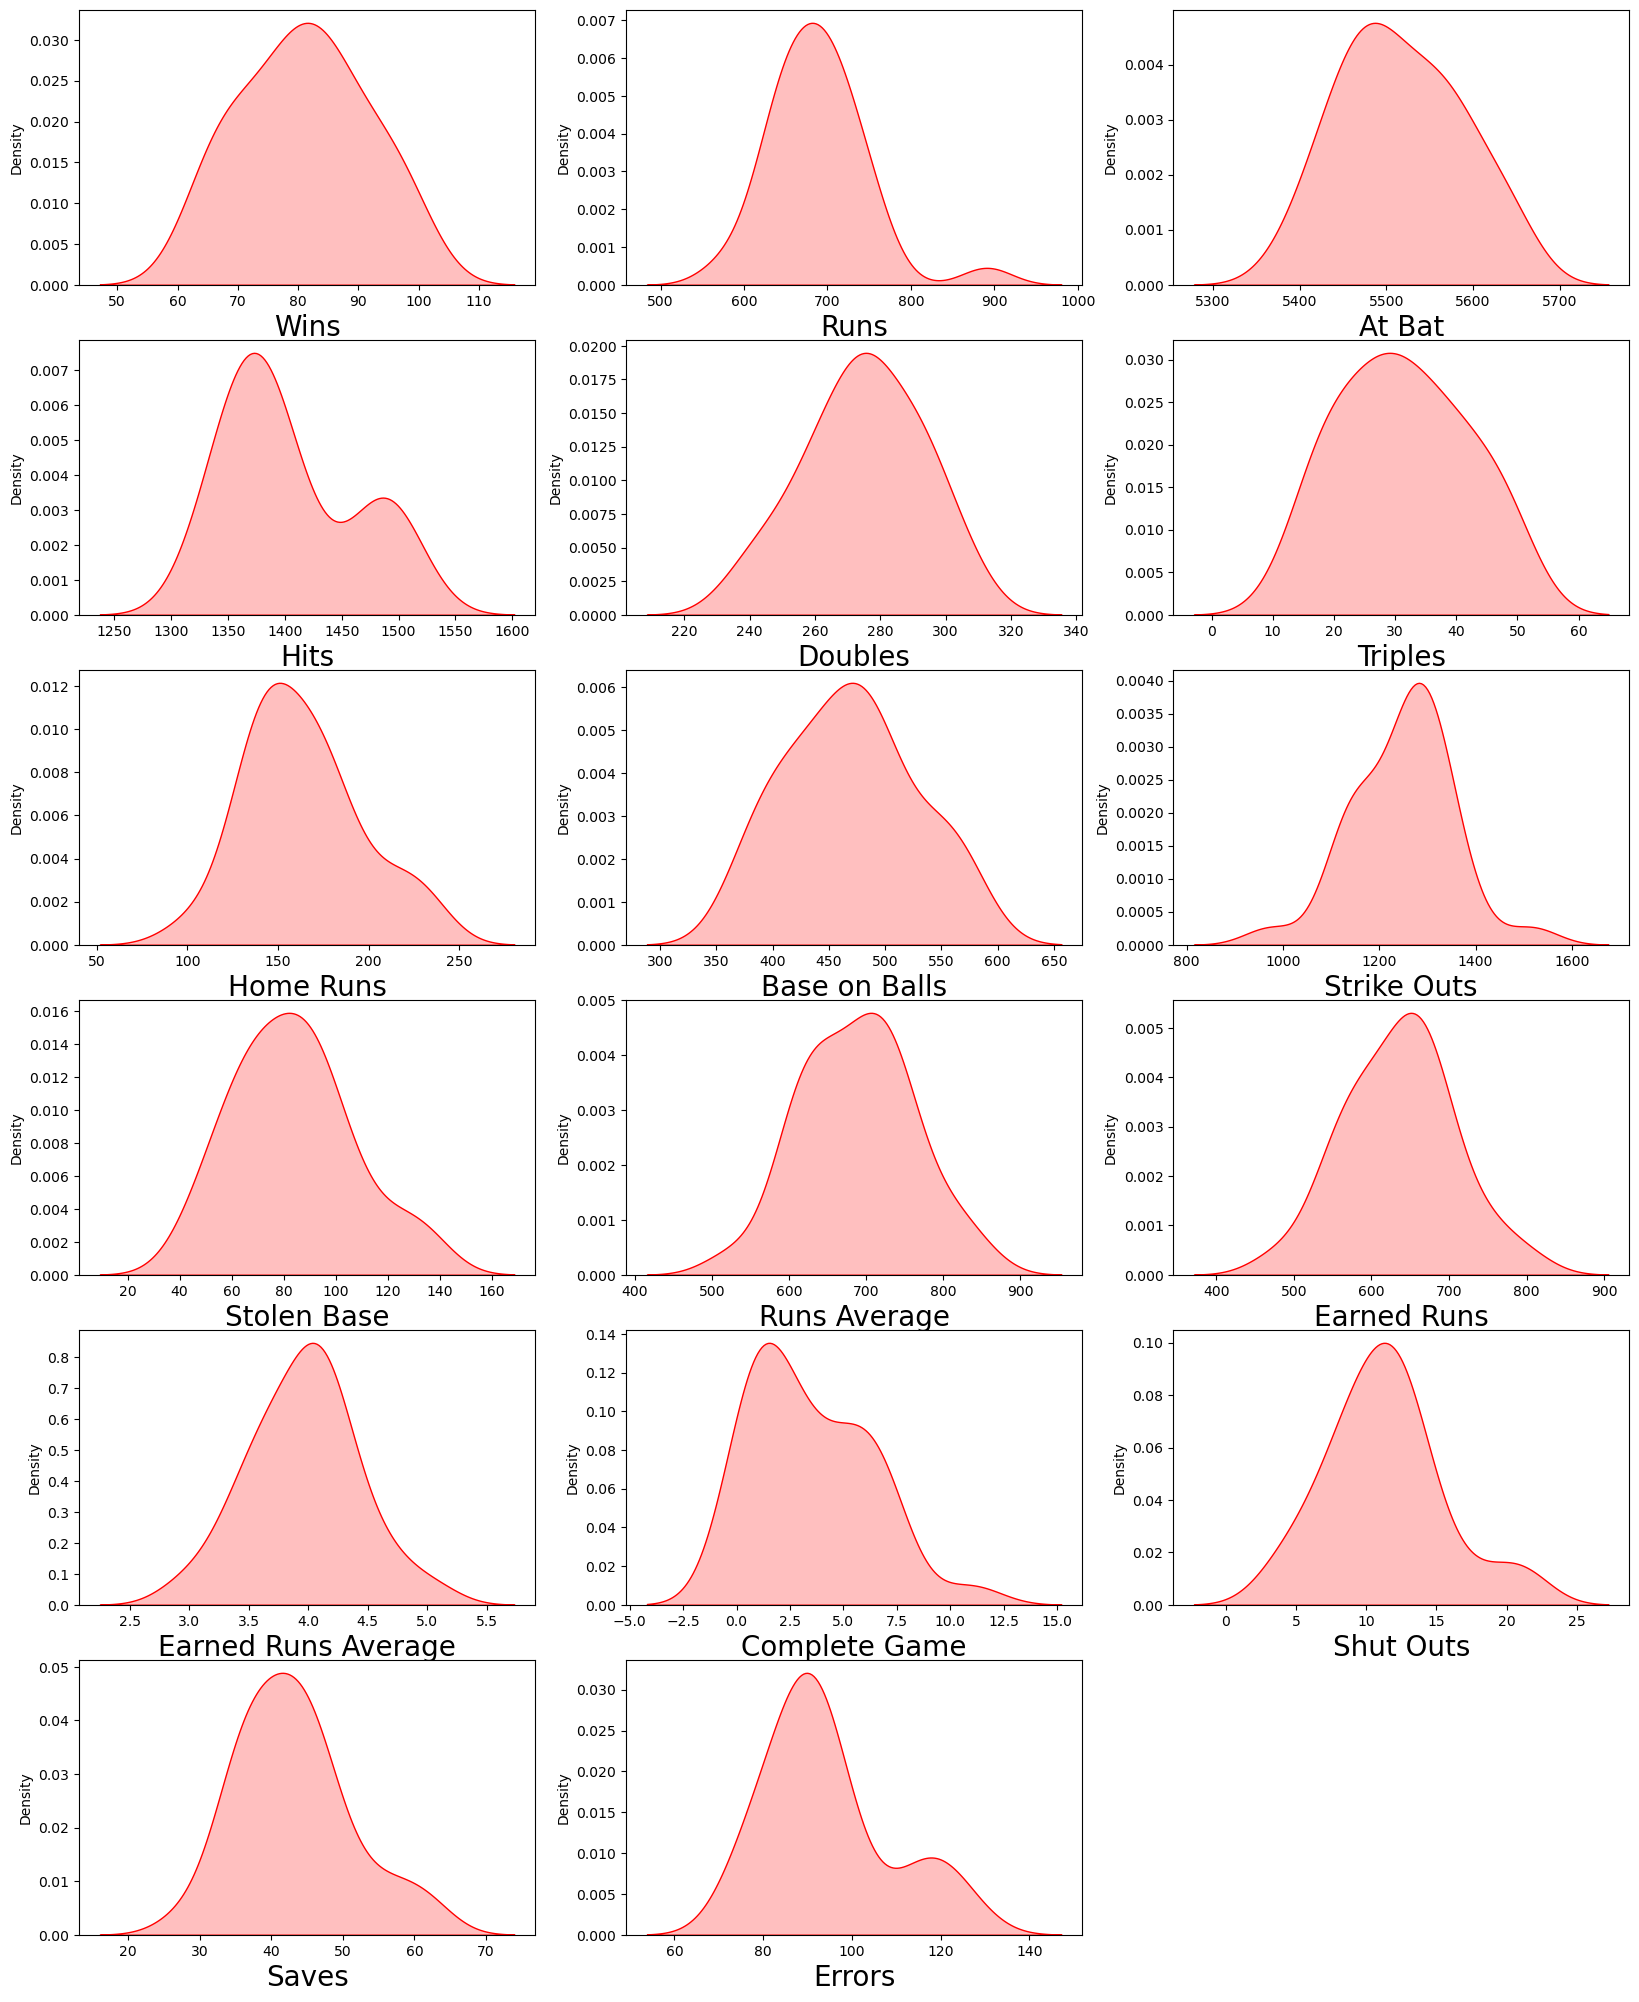

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in dataf:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(dataf[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Observation
It is obvious by looking that some features are skewed to the left or right.

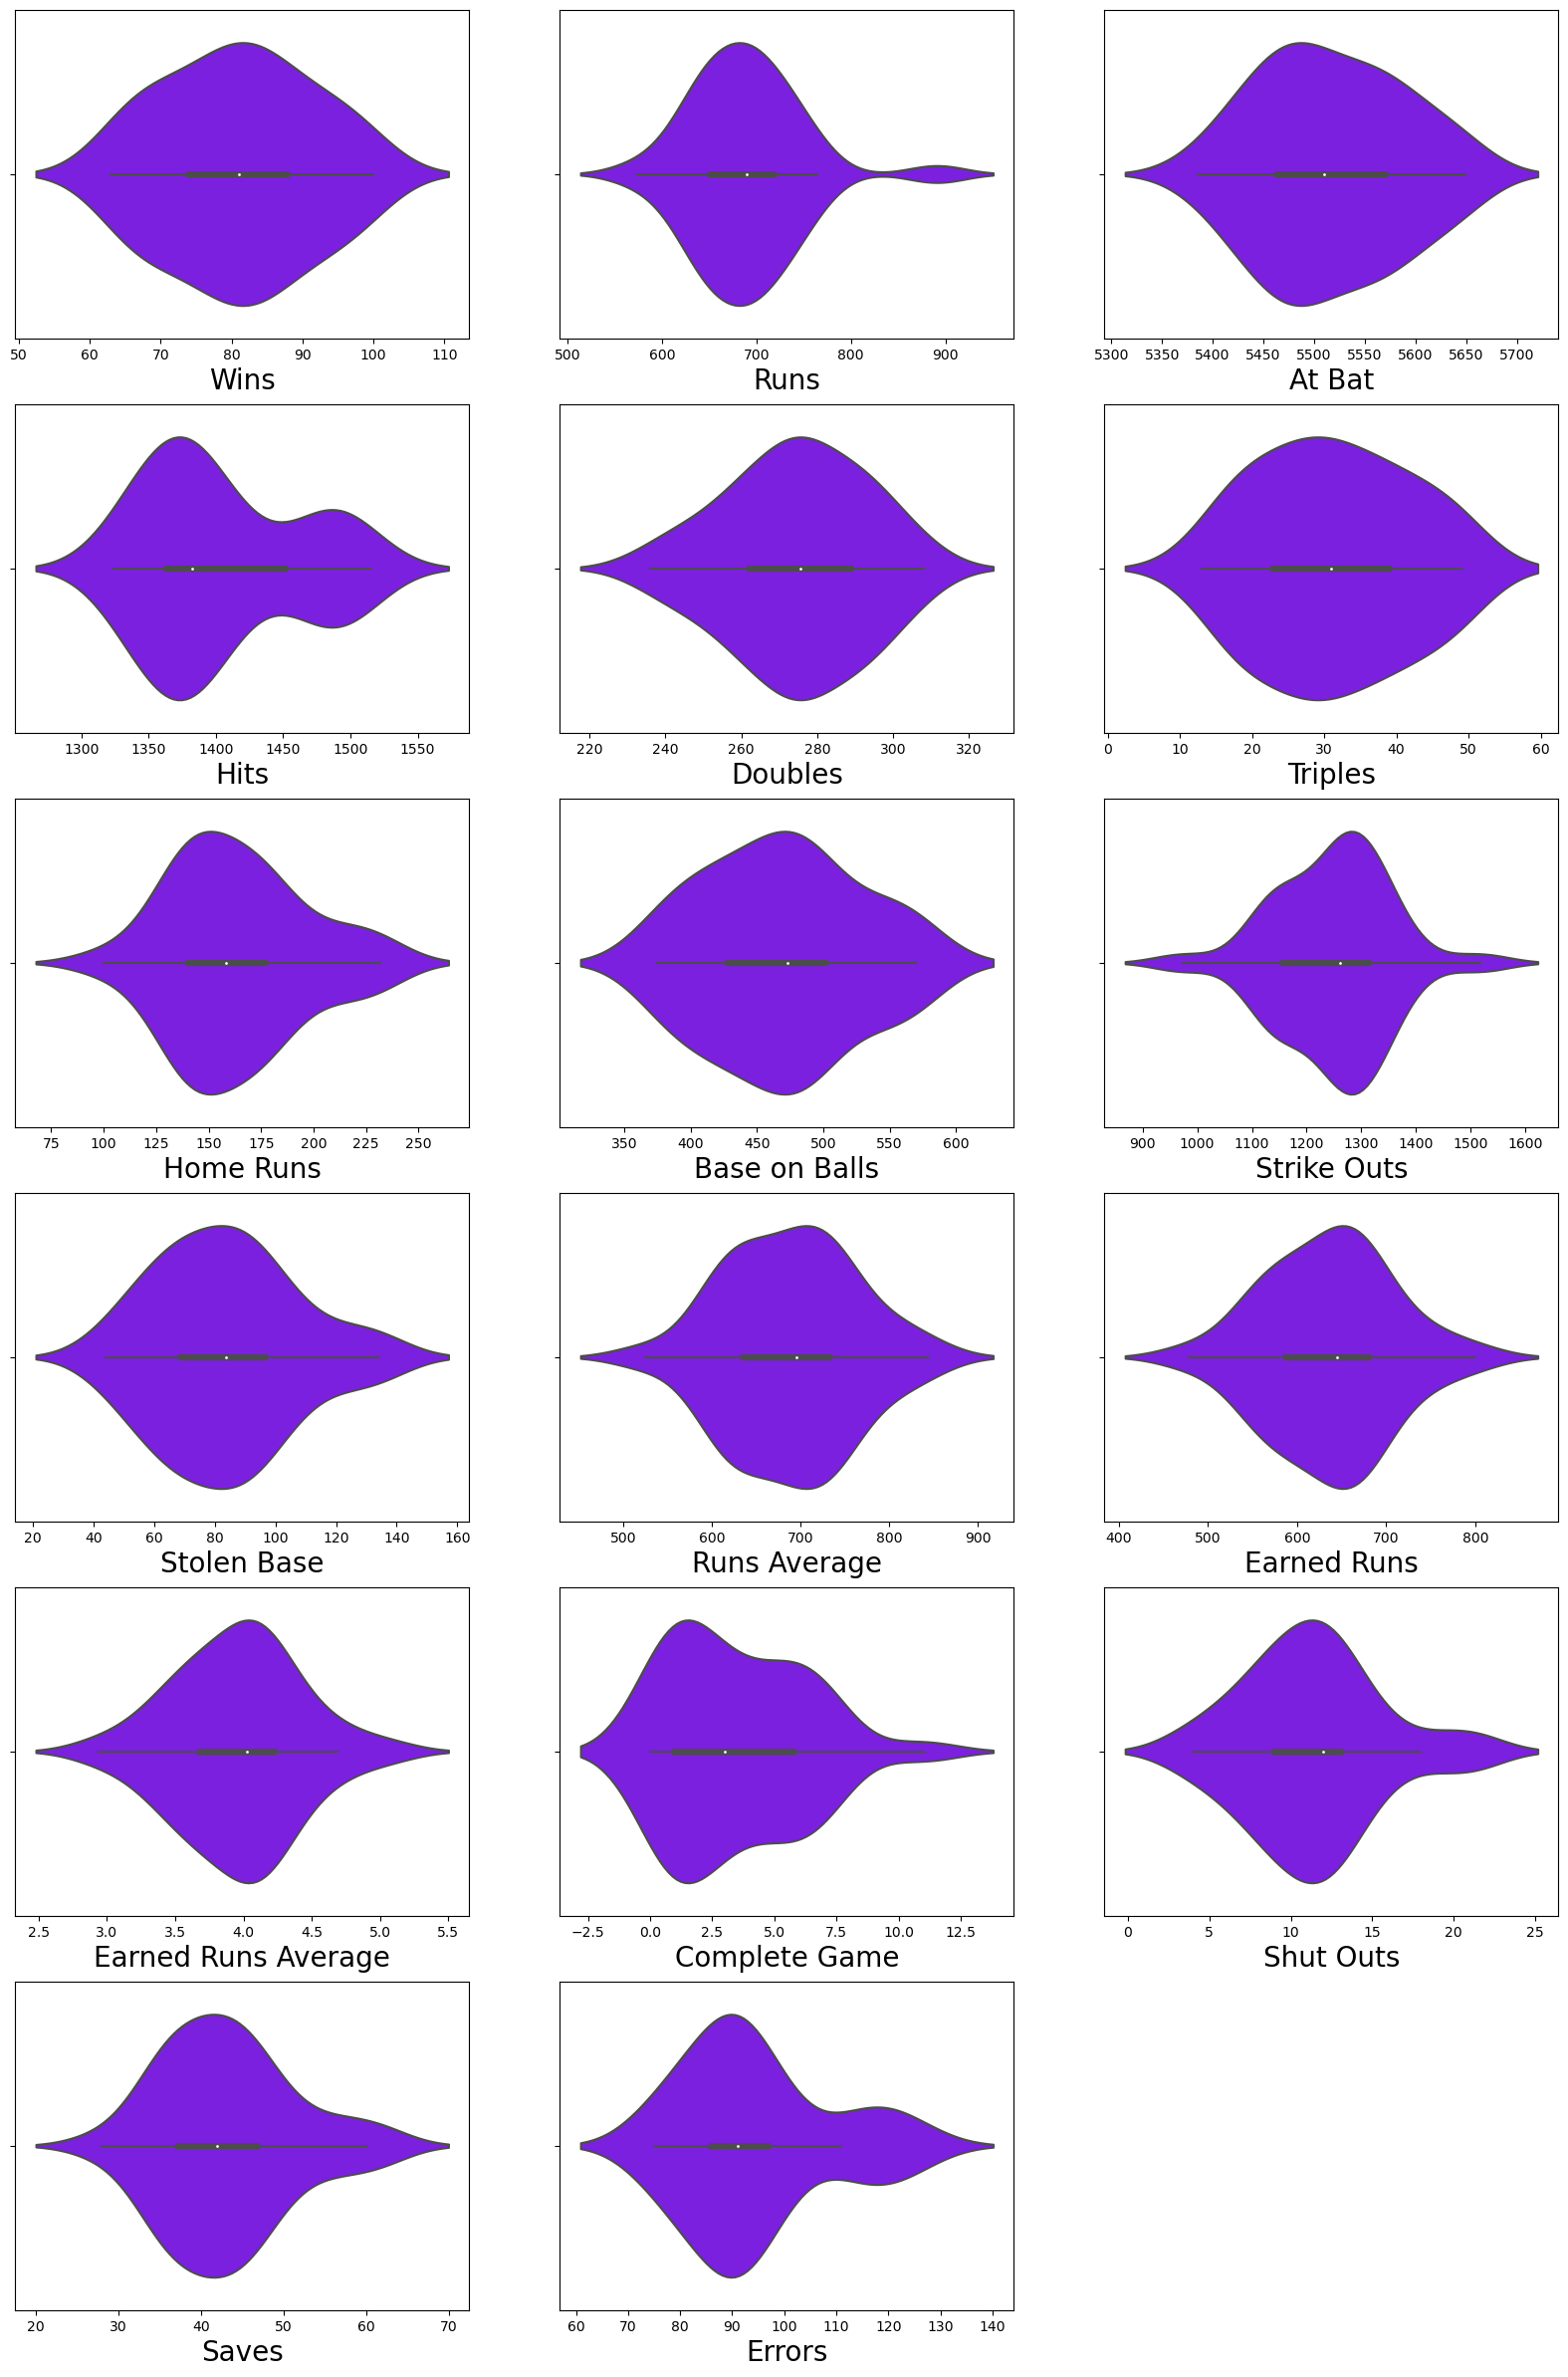

In [24]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in dataf:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.violinplot(dataf[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Observations
*Shut outs and Complete Games happen far less frequently these days, as the violinplot of these variables clearly shows.

*Although an error does not count as a hit, it still counts as an at bat for the hitter. We must thus examine the contribution of errors to at bats.

*Most saves fall in the 30 to 50 range. Although saves do not automatically make a pitcher a winning pitcher, they nonetheless help the team win.It will be fascinating to see how saves and victories are related, or how much saves help with winning.

*For pitcher statistics, run average, earned run, and earned run average are crucial. 

Now, using multivariate analysis, we will shed light on the number of hits that result in runs and ultimately result in a victory.

Text(0, 0.5, 'Hits')

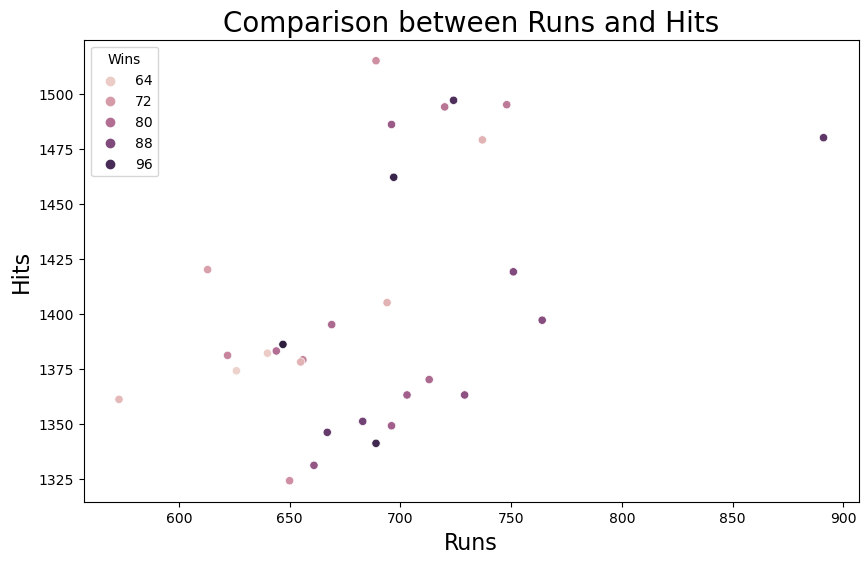

In [26]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and Hits',fontsize =20)
sns.scatterplot(dataf['Runs'],dataf['Hits'],hue=dataf['Wins'])
plt.xlabel('Runs',fontsize =16)
plt.ylabel("Hits",fontsize =16)

#Observation

1.Even if the number of times the ball is struck by the bat is fewer than 1375, runs between 650 and 750 nevertheless help the team win.

2.Runs under 650 and hits under 1325 have a very low winning chance.

3.In runs, there is one outlier. Even if a data point is genuine, we can decide after validating its validity whether to keep it or delete it from the ML model. Considering outlier data points will undoubtedly have an impact on the performance of ML models as the majority of data points won't fall into that category. the possibility for biassed modelling.

Text(0, 0.5, 'Home Runs')

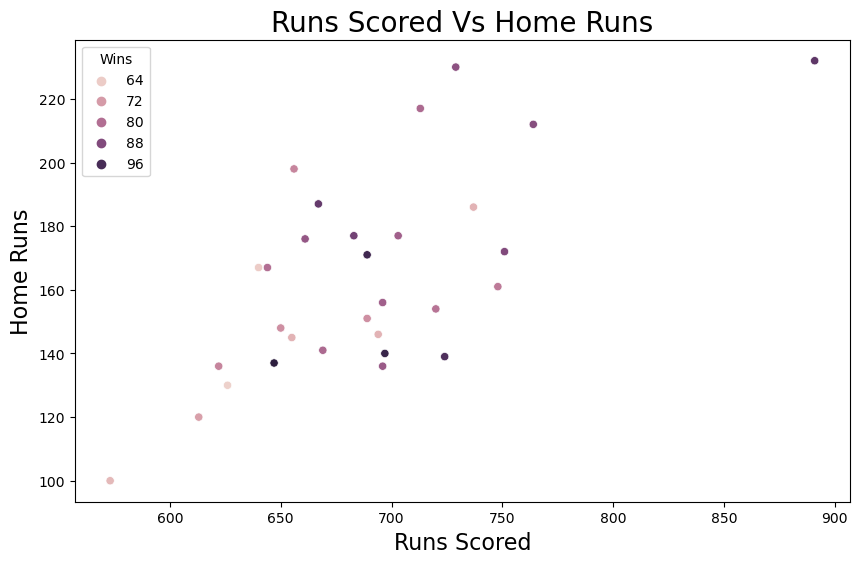

In [30]:
# Again Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Runs Scored Vs Home Runs',fontsize =20)
sns.scatterplot(dataf['Runs'],dataf['Home Runs'],hue=dataf['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel('Home Runs',fontsize =16)

# Observatoions

1.With a combination of home runs between 140 and 180 and runs scored between 650 and 750, a club may win more than 90 games. So maintaining home runs in this range is essential for increasing the likelihood of winning.

2.However, since it's only a game, anything is still conceivable with a winning performance by a single player. The scatter plot reveals that while some datapoints have home runs beyond 200, victories are still only around 80.

Text(0, 0.5, 'At Bat')

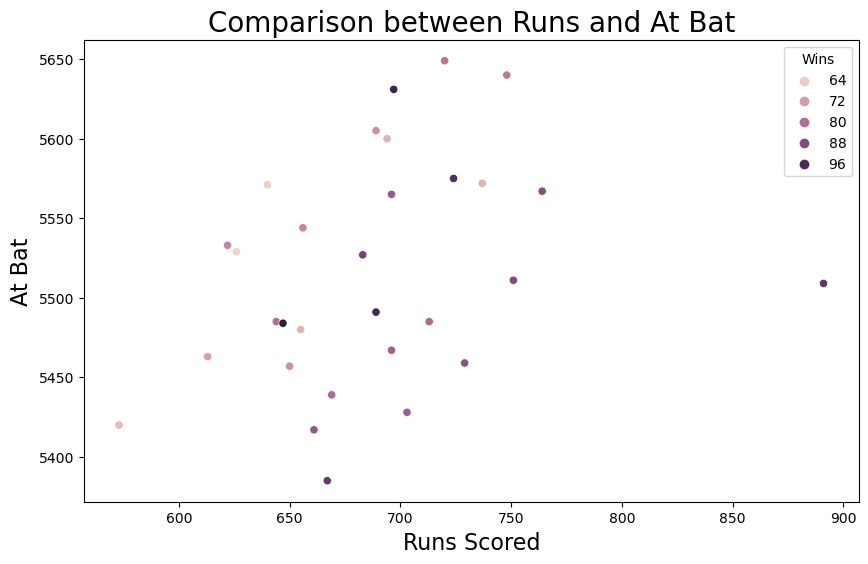

In [31]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[10,6])
plt.title('Comparison between Runs and At Bat', fontsize =20)
sns.scatterplot(dataf['Runs'],dataf['At Bat'],hue=dataf['Wins'])
plt.xlabel('Runs Scored',fontsize =16)
plt.ylabel("At Bat",fontsize =16)

# Observation

No benchmark at-bat range is given to us from this source. Therefore, the relevance of at bats to winning statistics is debatable. At least now we know that there is a positive linear relationship between runs scored and at bats, meaning that more runs scored will inevitably result in more at bats.

Text(0, 0.5, 'Earned Run Average')

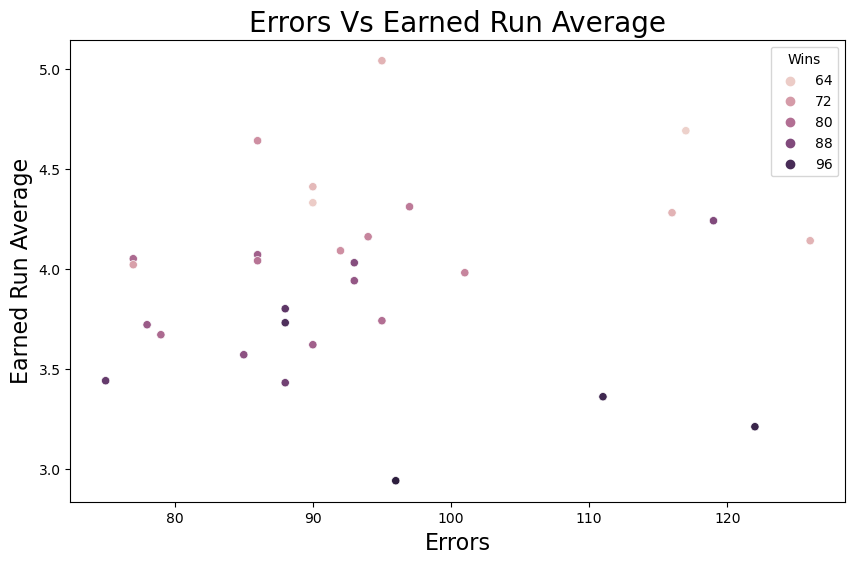

In [33]:
# Checking the relation between Errors and Earned run avaerage
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('Errors Vs Earned Run Average',fontsize =20)
sns.scatterplot(dataf['Errors'],dataf['Earned Runs Average'],hue=dataf['Wins'], cmap=('Spectral'))
plt.xlabel('Errors',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

# Observation
1.The ERA outcome is the same as it was in the Violin Plot.

2.Maintaining an ERA of 3.0 or under guarantees a certain win for the pitcher. A pitcher may preserve runs for his team by maintaining a low ERA.

3.The scatter plot shown above also shows that maximum victories are achieved with the least amount of mistake. Errors under the benchmark of 90 can be maintained.

Text(0, 0.5, 'Earned Run Average')

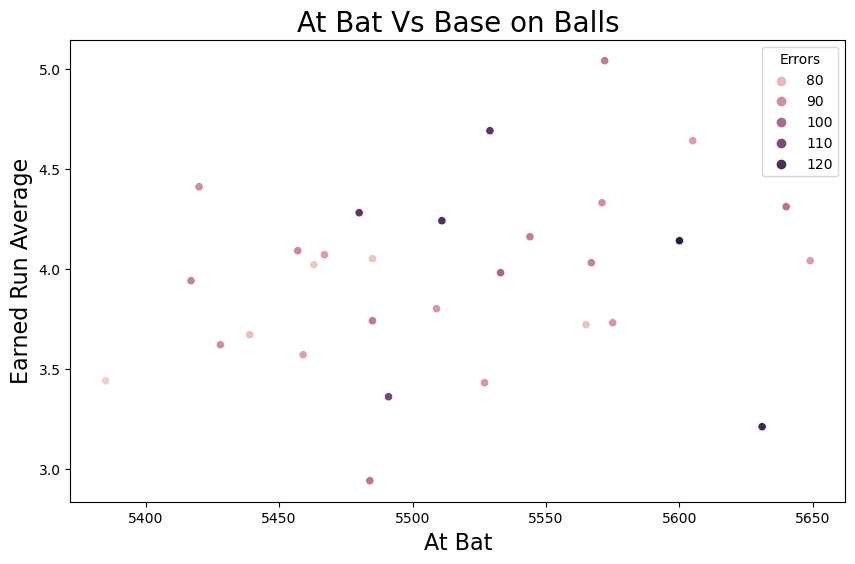

In [35]:
# Checking the relation between At Bat and Earned runs Average
sns.set_palette('hsv')
plt.figure(figsize=[10,6])
plt.title('At Bat Vs Base on Balls',fontsize =20)
sns.scatterplot(dataf['At Bat'],dataf['Earned Runs Average'],hue=dataf['Errors'], cmap=('Spectral'))
plt.xlabel('At Bat',fontsize =16)
plt.ylabel('Earned Run Average',fontsize =16)

# Observation
High ERA indicates High Error Rates, although At Bat vs Base on Balls doesn't provide any meaningful information about this.

# Boxplot
Utilising Boxplot to understand the  data's symmetry, skew, variance, and outliers.

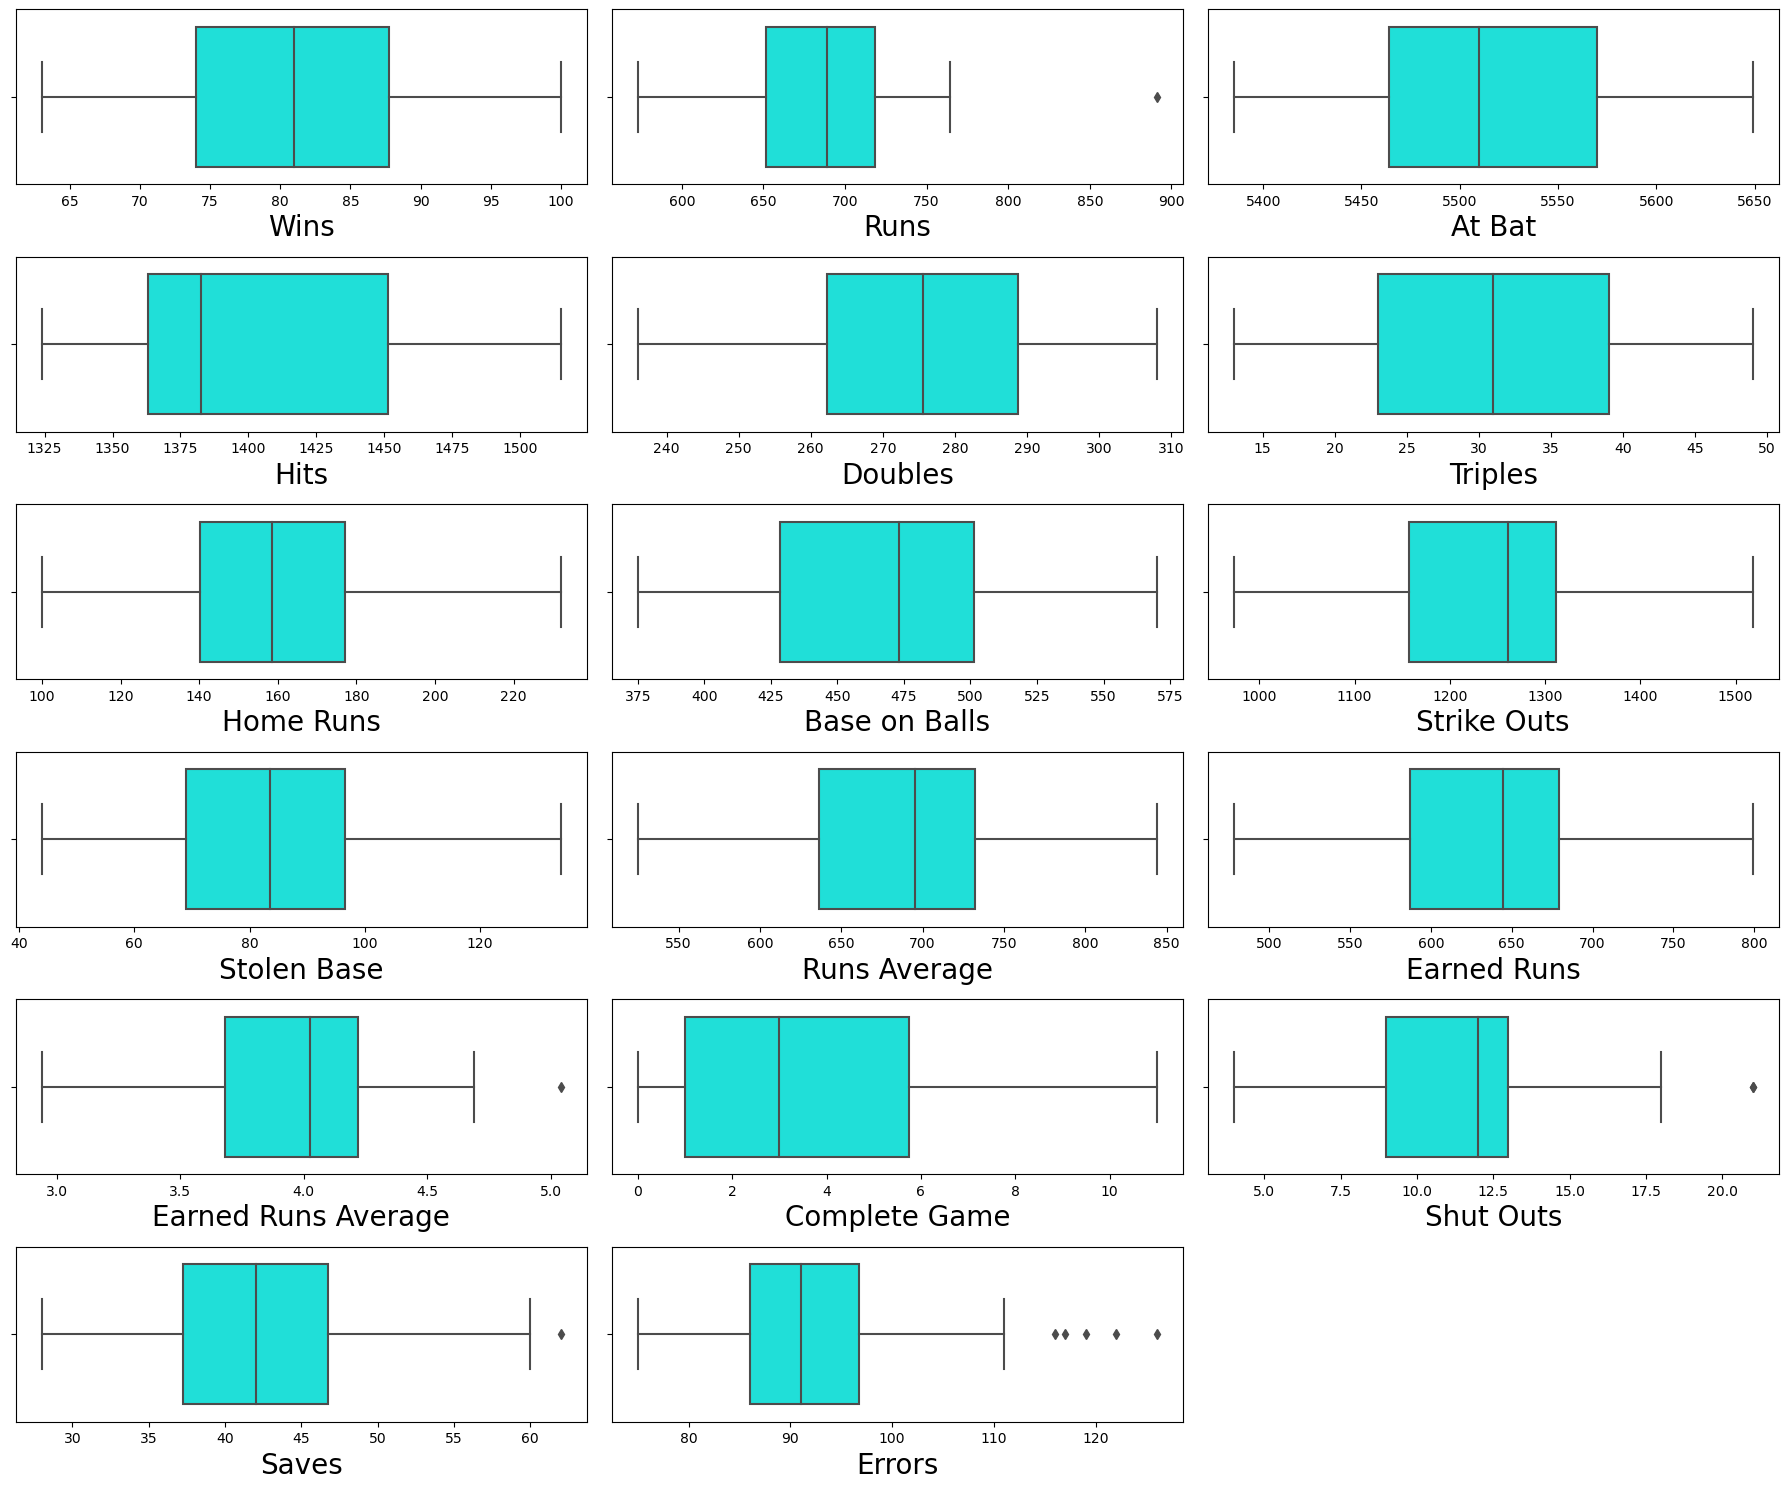

In [36]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in dataf:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(dataf[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Observations
1.The data contains a few outliers. However, these outliers are legitimate data points because they come from  2014 data.

2.Shutouts are uncommon, but they are totally feasible with excellent play.

3.One outlier exists in the Run score, however because Run is one of the most crucial parameters, it would be prudent to eliminate the associated datum.

4.Outliers in errors are definitely probable, therefore there is no need to be concerned.

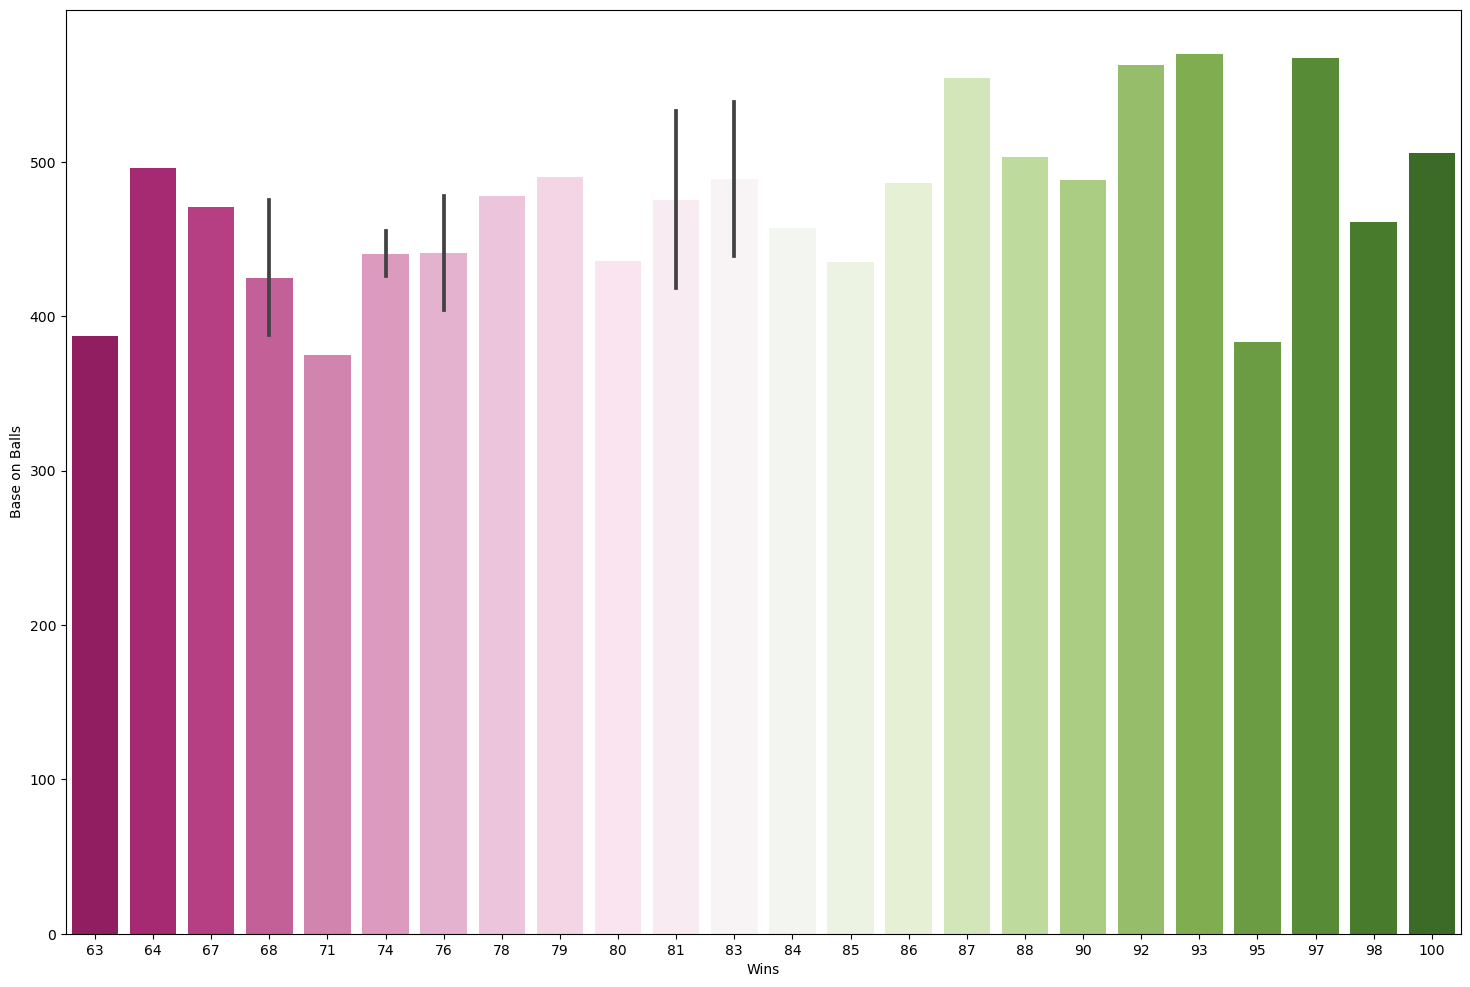

In [38]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Base on Balls", data=dataf,palette='PiYG')
plt.show()

# Observations
A pitcher's contribution to a batter's chance of success is the base on ball. It is similar to wide or no ball in cricket, to put it simply.
We can see that bases on balls above 400 definitely help a team win.

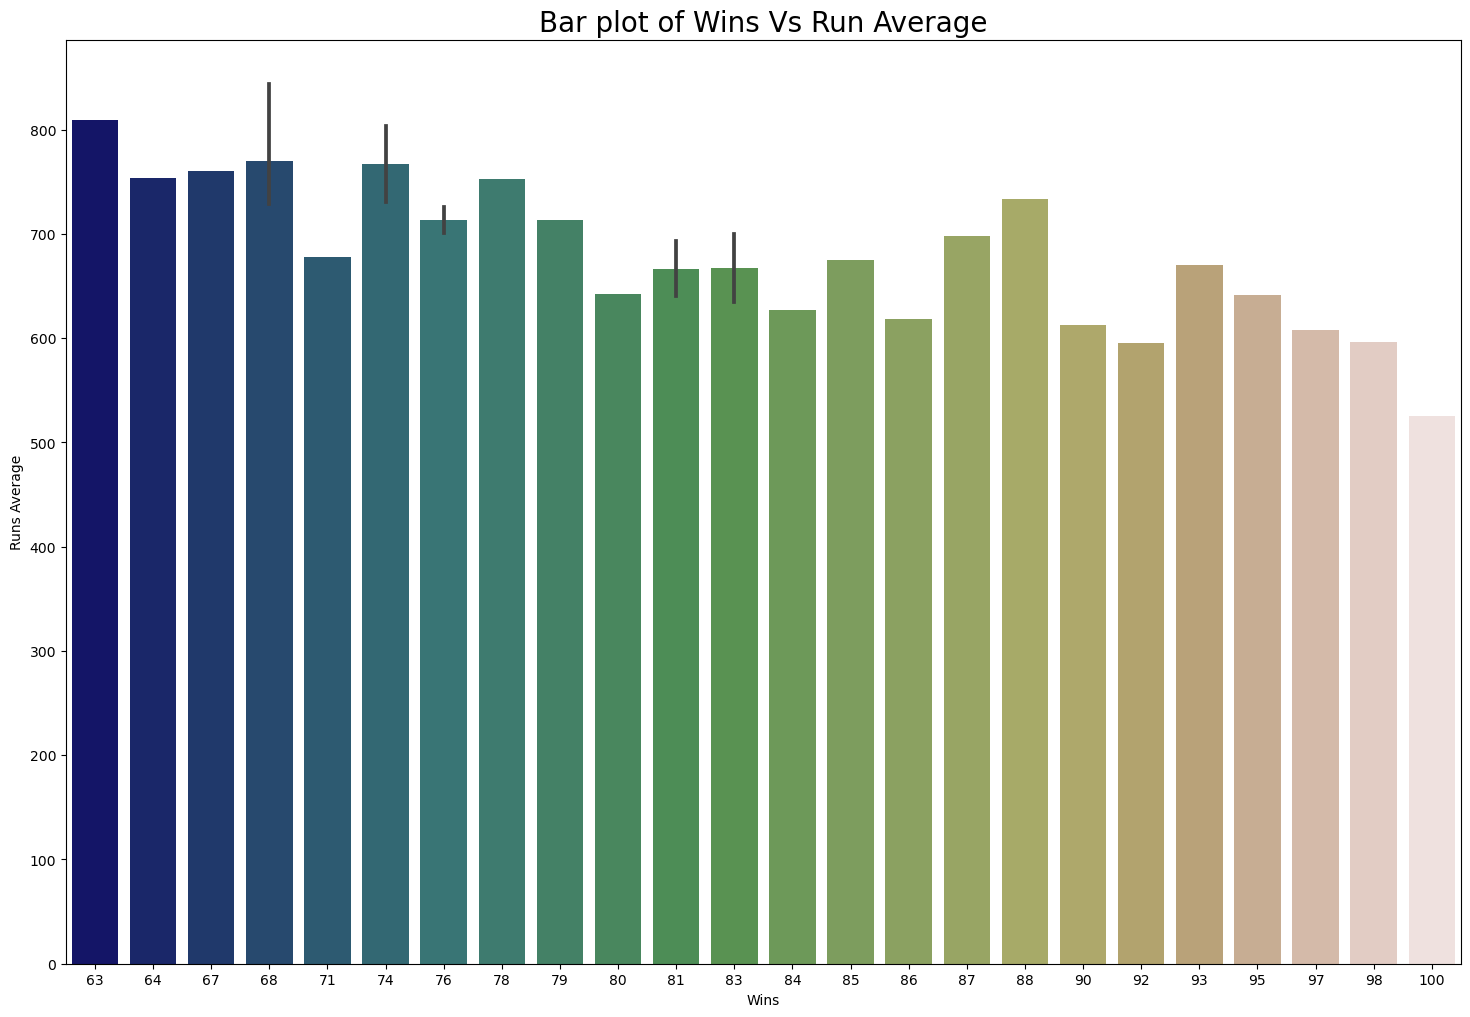

In [39]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Runs Average", data=dataf,palette='gist_earth')
plt.title('Bar plot of Wins Vs Run Average', fontsize =20)
plt.show()

# Observations
1.We can observe that the Run Average falls as the number of victories rises in this intriguing graphic. But why is this pattern continuing if additional runs directly enhance the likelihood of winning?

2.More Run Average provides the hitter an edge, but in this situation, victories are high even at low run totals, plainly indicating that the pitcher's performance is superior to the batter's, since pitcher is eliminating hitter at low run totals. 

3.Any pitcher-side statistical measure, like as strikeouts, earned runs, or earned run average, must account for this.

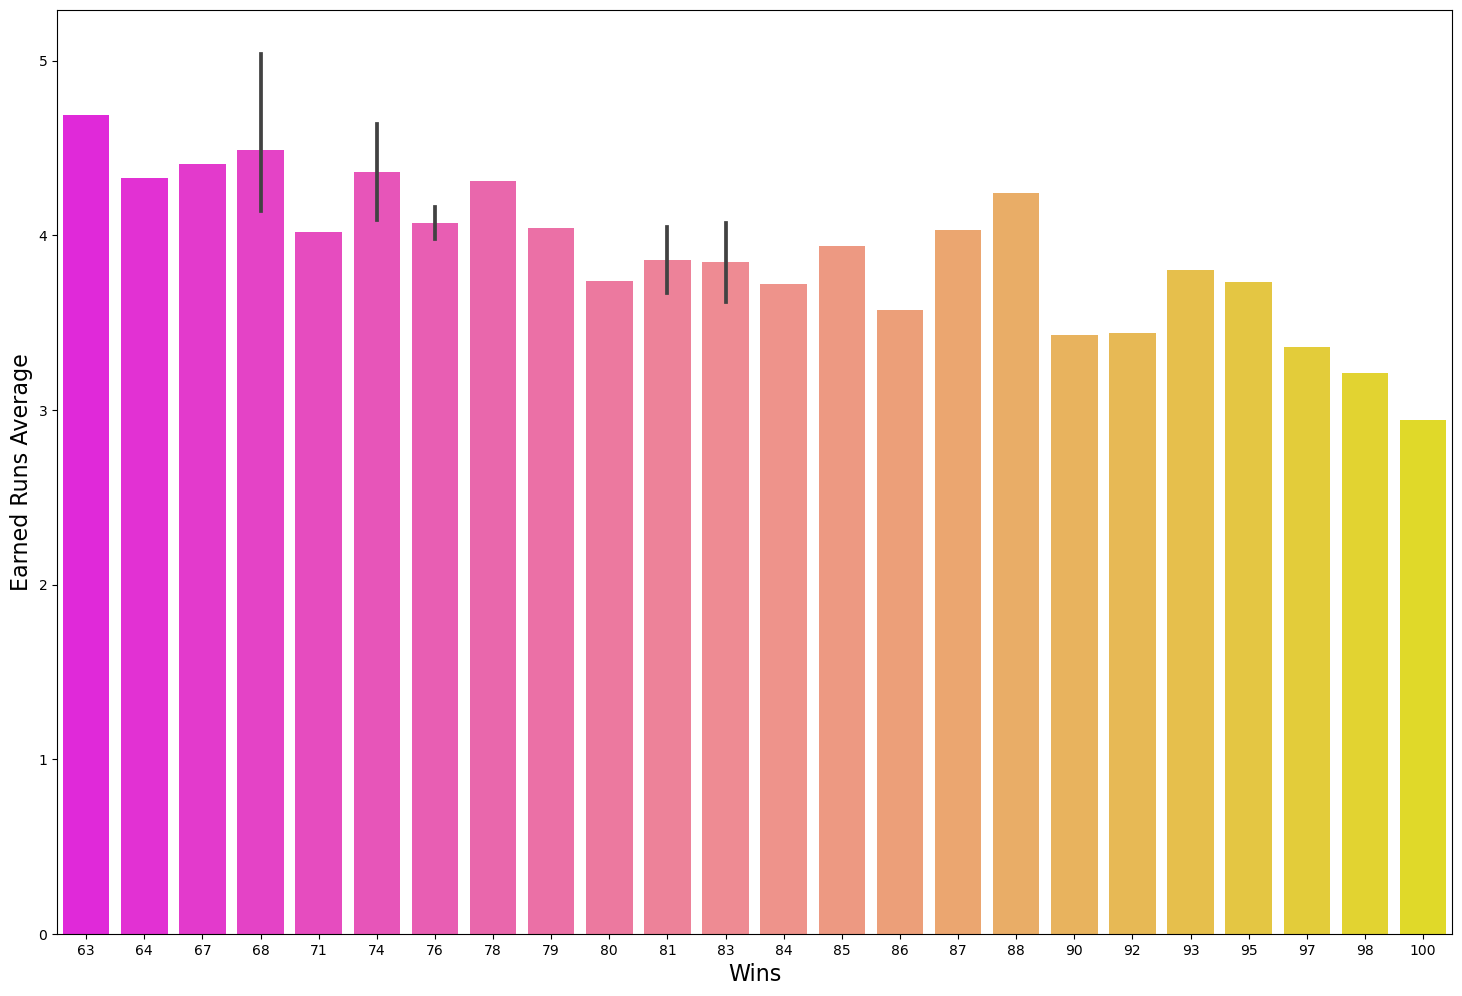

In [44]:
plt.figure(figsize=(18,12))
sns.barplot(x="Wins", y="Earned Runs Average", data=dataf,palette='spring')
plt.xlabel('Wins',fontsize =16)
plt.ylabel('Earned Runs Average',fontsize =16)
plt.show()

# Observations
And here we got what we looking for.As we thought there must be atleast one pitcher parameter where this decreasing trend must be reflected.
ERA is low for maximum wins. Low ERA by pitcher clearly means that pitcher is giving less chance given to batter to score run.
We already come to conclusion of keeping ERA less than 3.5 in previous result. This plot also support that story.
But this also indicate that ERA and Runs Average score are bound to related with each other in linear relationship (may be positive or negtive).
Another things here is that Earned Run and Wins must have negative relationship. we will check it in further investigation.

Text(0, 0.5, 'Earned Run Average')

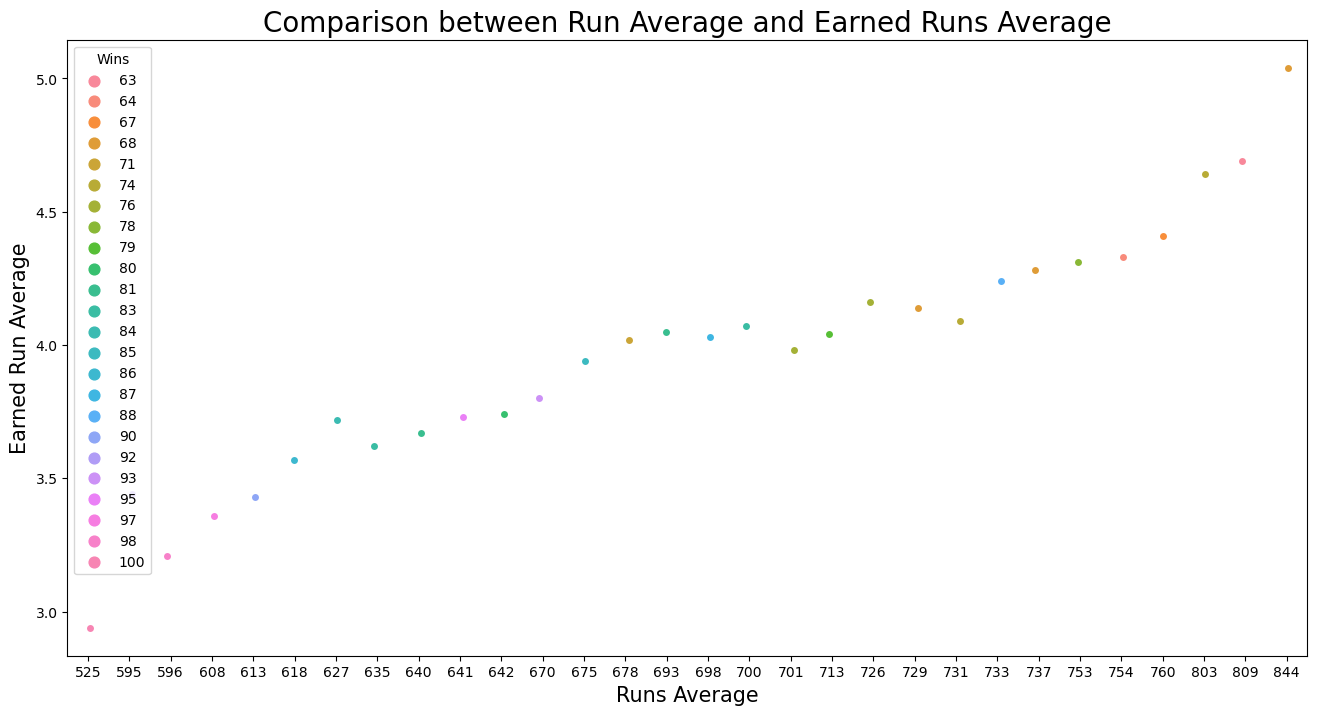

In [46]:
# Checking the relation between two variables
sns.set_palette('Set1')
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Runs Average', fontsize =20)
sns.stripplot(dataf['Runs Average'],dataf['Earned Runs Average'],hue=dataf['Wins'])
plt.xlabel('Runs Average',fontsize =15)
plt.ylabel("Earned Run Average",fontsize =15)

# Observation
We found what we expected from the previous plot here. Runs Average and Earned Runs Average are linearly related.

# Outlier detection
Checking Outlier in Runs Scored

In [51]:
dataf['Runs'].max() #To find out the maximum Value


891

In [54]:
dataf.loc[dataf['Runs']==891] #To locate the maximum value

Wins  Runs  At Bat  Hits  Doubles  Triples  Home Runs  Base on Balls  \
5    93   891    5509  1480      308       17        232            570   

   Strike Outs  Stolen Base  Runs Average  Earned Runs  Earned Runs Average  \
5         1151           88           670          609                  3.8   

   Complete Game  Shut Outs  Saves  Errors  
5              7         10     34      88

# Observation
The highest doubles, home runs, and base hits appear to be included in this entry as well. Let's double-check

In [55]:
dataf['Home Runs'].max(),dataf['Base on Balls'].max(),dataf['Doubles'].max()

(232, 570, 308)

# 
We have what we expected here.

# Observation
We hypothesised that the link between Earned Run/Earned Run Average and Wins in one of the previous results must be negative; let's verify this by examining the jointplot.

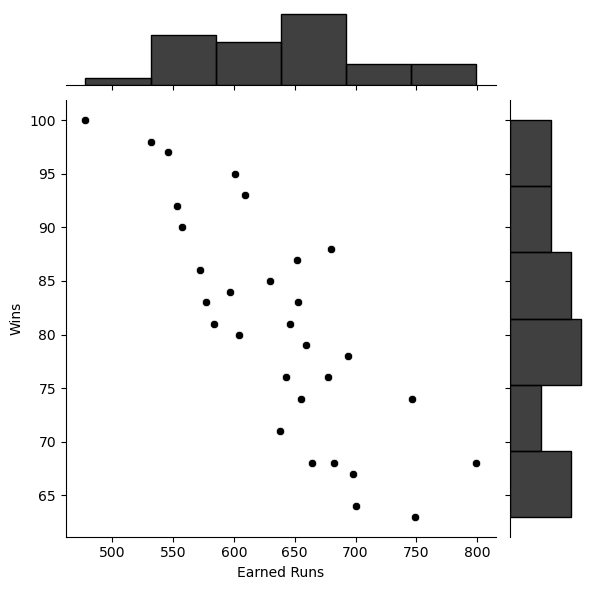

In [58]:
sns.jointplot(x="Earned Runs", y="Wins", data=dataf, color="Black",palette="Set1") #Utlising Joint Plot

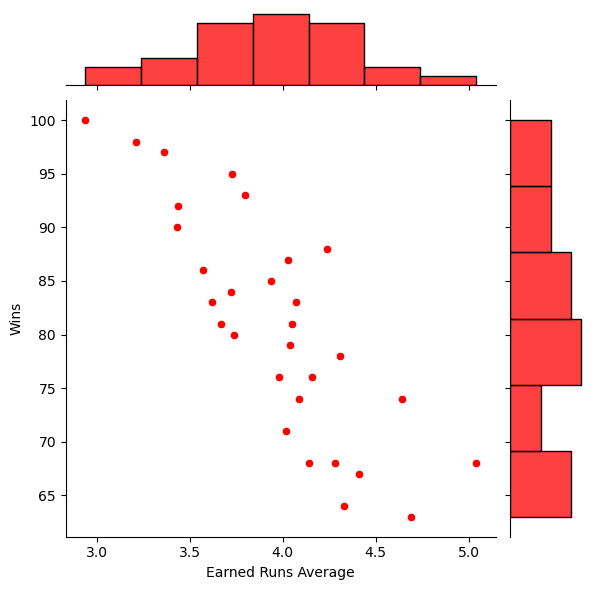

In [60]:
sns.jointplot(x="Earned Runs Average", y="Wins", data=dataf, color="Red",palette="Set1")

# Observation
Now it is evident that there a negative linear realtionship between them

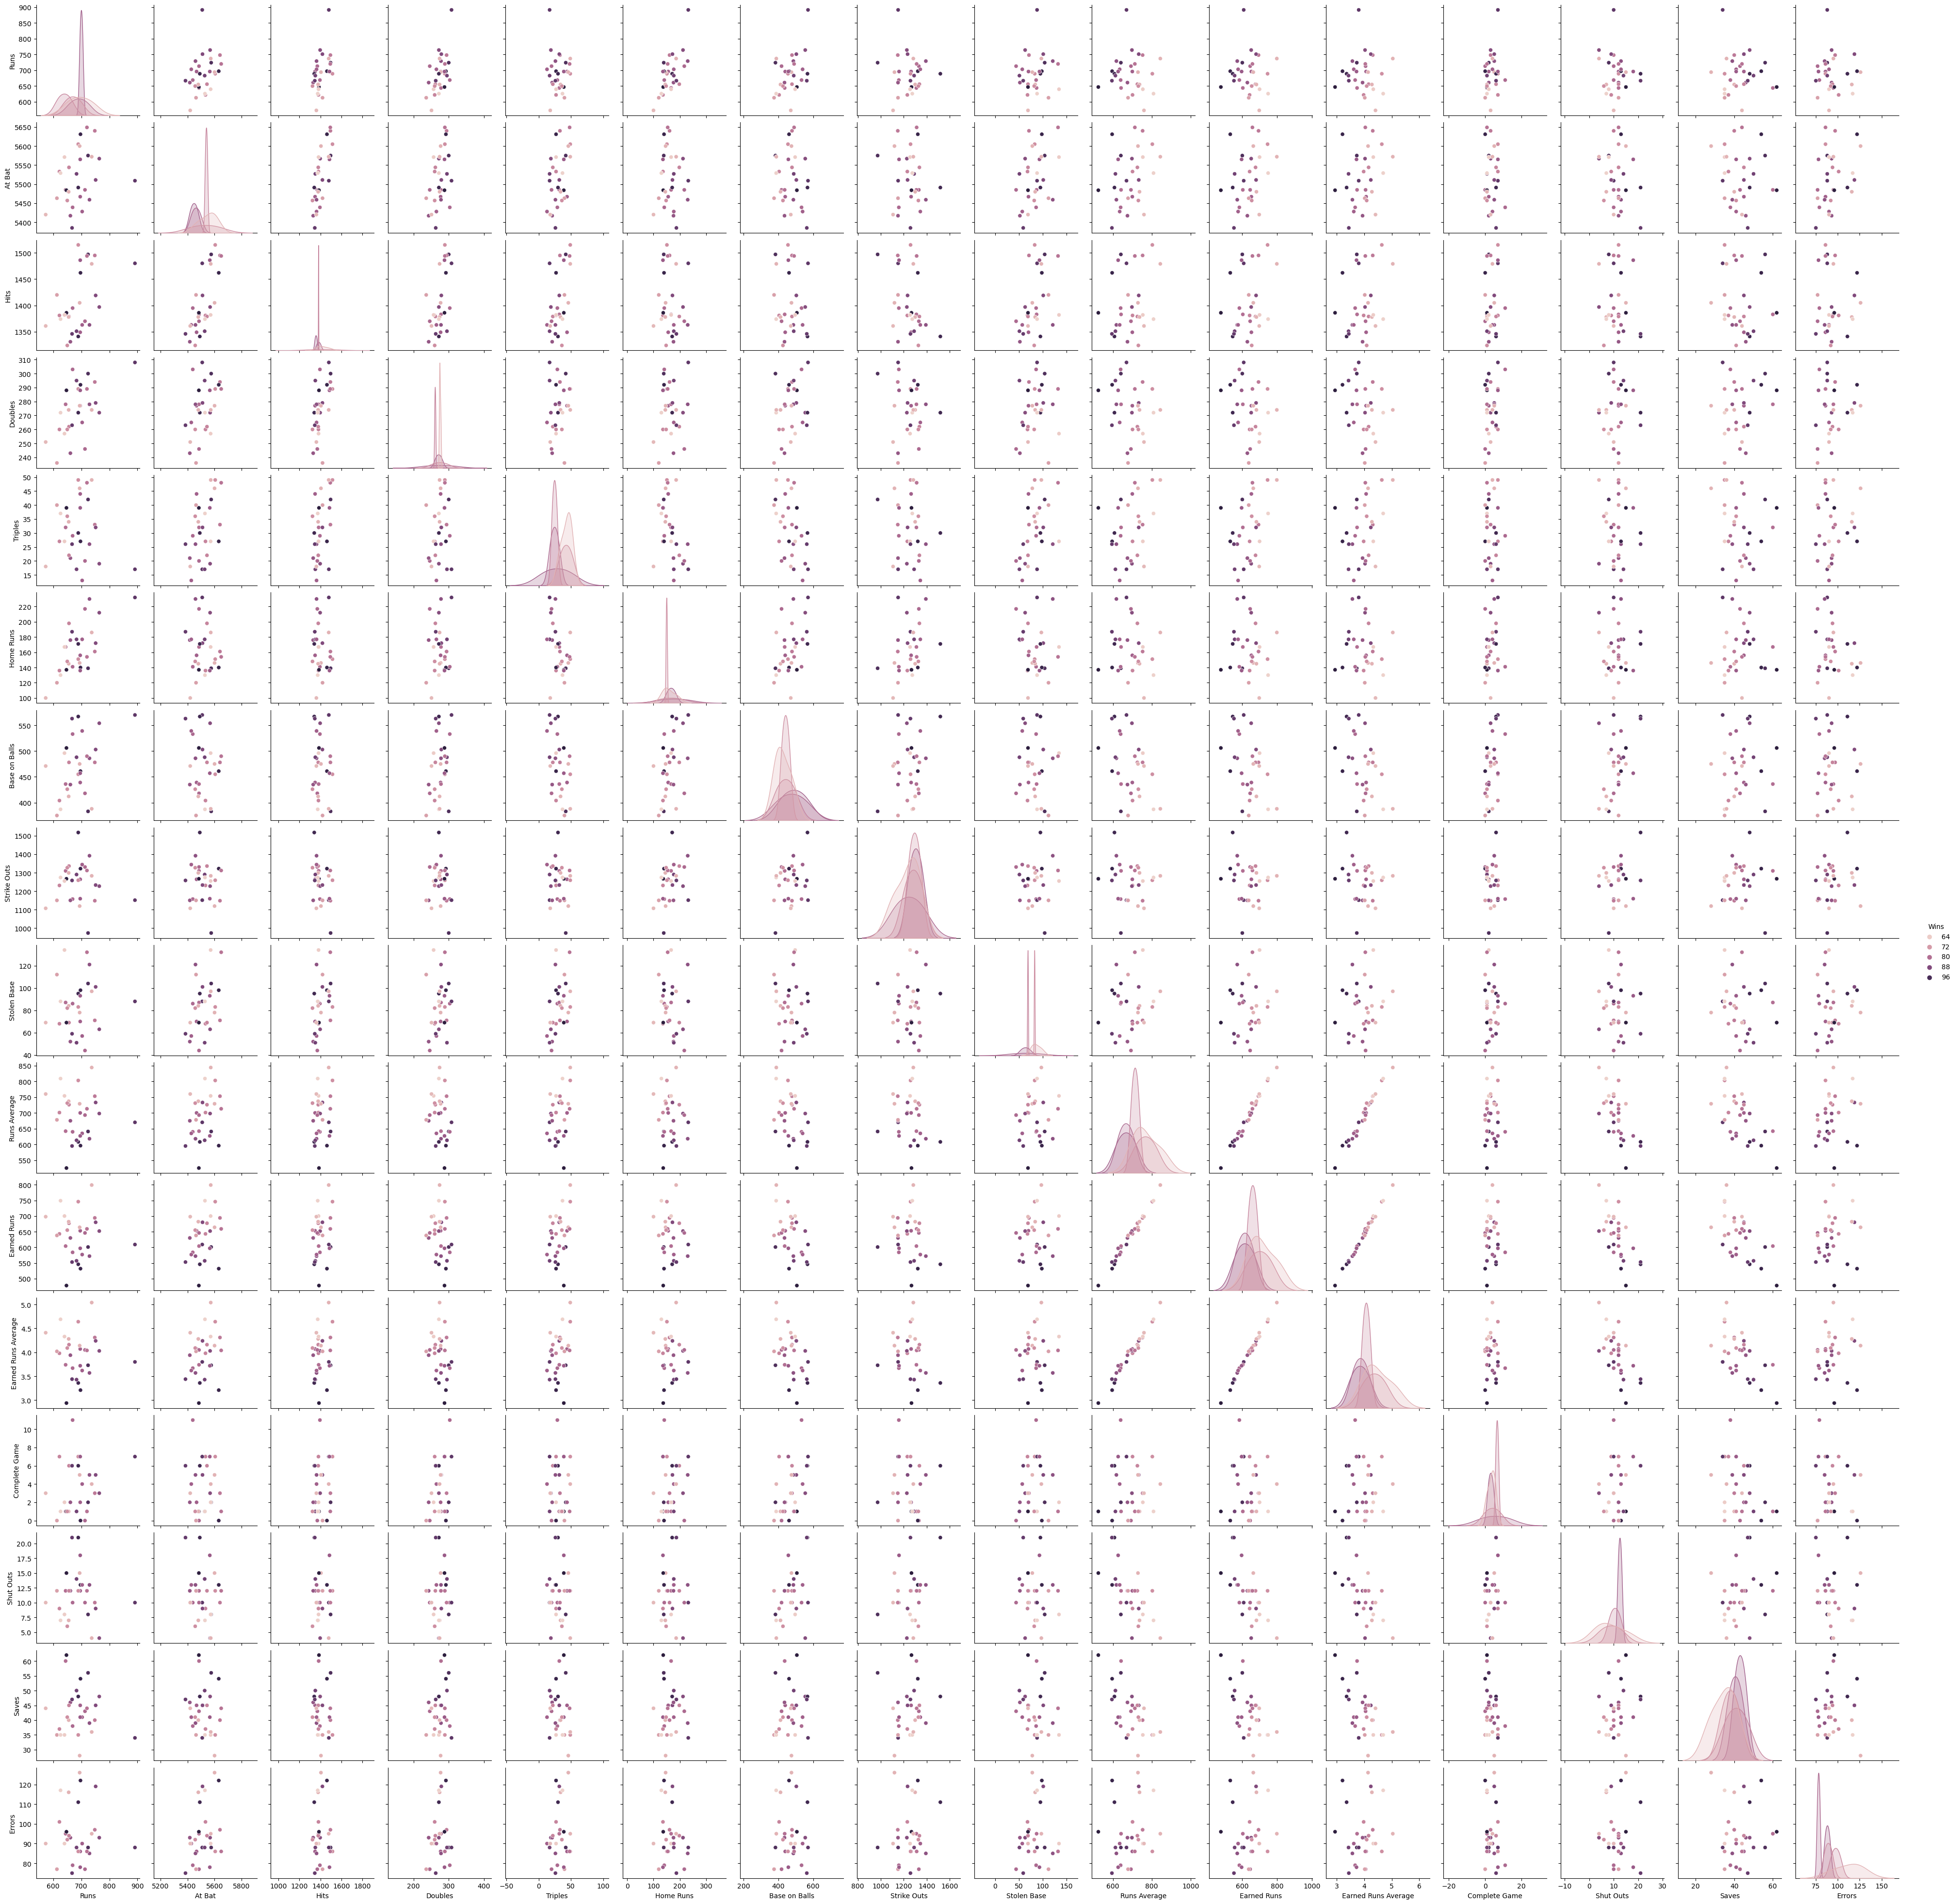

In [62]:
sns.pairplot(dataf, hue="Wins") # Utilisng pairplot for the target variable


# Outliers Detection and Removal

In [63]:
from scipy.stats import zscore #Using Zscore
z = np.abs(zscore(dataf))
threshold = 3
dataf1 = dataf[(z<3).all(axis = 1)]

In [64]:
print('Shape of dataset after detecting and removing the outliers :',dataf1.shape)

Shape of dataset after detecting and removing the outliers : (29, 17)


# 
Let's check out the data loss in the process

In [65]:
print("Percentage Data Loss",((30-29)/30)*100,'%')

Percentage Data Loss 3.3333333333333335 %


# Checking Skewness of the Features

In [66]:
dataf1.skew()

Wins                   0.119013
Runs                  -0.215364
At Bat                 0.169573
Hits                   0.783772
Doubles               -0.335304
Triples                0.090124
Home Runs              0.450862
Base on Balls          0.151193
Strike Outs           -0.233815
Stolen Base            0.494966
Runs Average           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Game          0.854980
Shut Outs              0.526943
Saves                  0.627480
Errors                 0.840271
dtype: float64

# 
Skewness should be between -0.5 and 0.5.
Errors, Shutouts, Saves, Complete Games, and Hits are definitely Need to change; skewed by nature.

In [67]:
#Utilising the boxcox transformation to transform data with a positive or right skew
from scipy.stats import boxcox #importing library
dataf1['Hits']=boxcox(dataf1['Hits'],-2)
dataf1['Saves']=boxcox(dataf1['Saves'],0.5)
dataf1['Shut Outs']=boxcox(dataf1['Shut Outs'],0.5)


# Comment
The Boxcox Method cannot convert other features since the data they show must be positive. Other columns are therefore converted using the Yeo-Johnson approach.

In [68]:
from sklearn.preprocessing import PowerTransformer #Inporting libraries
from sklearn.compose import ColumnTransformer

In [71]:
EC=['Errors','Complete Game']
ds =dataf1[EC].copy()
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(dataf1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

Errors  Complete Game
0 -0.348265      -0.307098
1 -0.540820      -0.307098
2 -1.326125       2.011315
3  0.650818       1.264463
4 -0.540820       1.264463

In [72]:
# reseting index and mergeing transformed data
dataf1.reset_index(drop=True, inplace=True)
dataset.index=dataf1.index
dataf1[EC]=dataset[EC]

Checking skewness after transforming data

In [73]:
dataf1.skew()

Wins                   0.119013
Runs                  -0.215364
At Bat                 0.169573
Hits                   0.000000
Doubles               -0.335304
Triples                0.090124
Home Runs              0.450862
Base on Balls          0.151193
Strike Outs           -0.233815
Stolen Base            0.494966
Runs Average           0.018155
Earned Runs            0.018461
Earned Runs Average    0.016693
Complete Game         -0.045947
Shut Outs             -0.085802
Saves                  0.370280
Errors                 0.065585
dtype: float64

# Correlation

In [74]:
dataf1.corr()

Wins      Runs    At Bat      Hits   Doubles  \
Wins                 1.000000  0.390451 -0.085780 -0.025885  0.384886   
Runs                 0.390451  1.000000  0.438022  0.429083  0.469293   
At Bat              -0.085780  0.438022  1.000000  0.771485  0.490752   
Hits                -0.025885  0.429083  0.771485  1.000000  0.525668   
Doubles              0.384886  0.469293  0.490752  0.525668  1.000000   
Triples             -0.206737  0.134204  0.445604  0.574467  0.342419   
Home Runs            0.245697  0.586894 -0.064653 -0.219890 -0.098695   
Base on Balls        0.447513  0.258450 -0.137850 -0.220426  0.211243   
Strike Outs          0.156469  0.081158 -0.111243 -0.375825 -0.096772   
Stolen Base         -0.169503  0.075323  0.373674  0.424369  0.194308   
Runs Average        -0.823176 -0.013858  0.315499  0.241583 -0.215196   
Earned Runs         -0.815308  0.007727  0.309146  0.278600 -0.224993   
Earned Runs Average -0.826952 -0.009122  0.254872  0.254635 -0.248212   
Complete Game        0.007696  0.155122 -0.059648  0.070020  0.227220   
Shut Outs            0.477949 -0.119300 -0.193987 -0.134500  0.088345   
Saves                0.754886  0.071589 -0.127766 -0.093443  0.258675   
Errors              -0.079633  0.039865  0.332002 -0.012712  0.152541   

                      Triples  Home Runs  Base on Balls  Strike Outs  \
Wins                -0.206737   0.245697       0.447513     0.156469   
Runs                 0.134204   0.586894       0.258450     0.081158   
At Bat               0.445604  -0.064653      -0.137850    -0.111243   
Hits                 0.574467  -0.219890      -0.220426    -0.375825   
Doubles              0.342419  -0.098695       0.211243    -0.096772   
Triples              1.000000  -0.369299      -0.404852    -0.196586   
Home Runs           -0.369299   1.000000       0.336814     0.479914   
Base on Balls       -0.404852   0.336814       1.000000     0.315566   
Strike Outs         -0.196586   0.479914       0.315566     1.000000   
Stolen Base          0.483818  -0.166072      -0.117622     0.038188   
Runs Average         0.312750  -0.092586      -0.425381    -0.140570   
Earned Runs          0.333731  -0.062094      -0.455832    -0.177655   
Earned Runs Average  0.325883  -0.070756      -0.465794    -0.195362   
Complete Game       -0.004496   0.118284       0.445335    -0.063129   
Shut Outs           -0.067667  -0.030256       0.434799     0.200067   
Saves               -0.236230   0.084263       0.197177     0.105667   
Errors               0.080498  -0.165883      -0.056106     0.164817   

                     Stolen Base  Runs Average  Earned Runs  \
Wins                   -0.169503     -0.823176    -0.815308   
Runs                    0.075323     -0.013858     0.007727   
At Bat                  0.373674      0.315499     0.309146   
Hits                    0.424369      0.241583     0.278600   
Doubles                 0.194308     -0.215196    -0.224993   
Triples                 0.483818      0.312750     0.333731   
Home Runs              -0.166072     -0.092586    -0.062094   
Base on Balls          -0.117622     -0.425381    -0.455832   
Strike Outs             0.038188     -0.140570    -0.177655   
Stolen Base             1.000000      0.134315     0.146243   
Runs Average            0.134315      1.000000     0.991286   
Earned Runs             0.146243      0.991286     1.000000   
Earned Runs Average     0.128848      0.986781     0.997261   
Complete Game          -0.040524      0.062434     0.067069   
Shut Outs              -0.098740     -0.641778    -0.639589   
Saves                  -0.187605     -0.637543    -0.616471   
Errors                  0.070527      0.231036     0.165556   

                     Earned Runs Average  Complete Game  Shut Outs     Saves  \
Wins                           -0.826952       0.007696   0.477949  0.754886   
Runs                           -0.009122       0.155122  -0.119300  0.071589   
At Bat                          0.2548

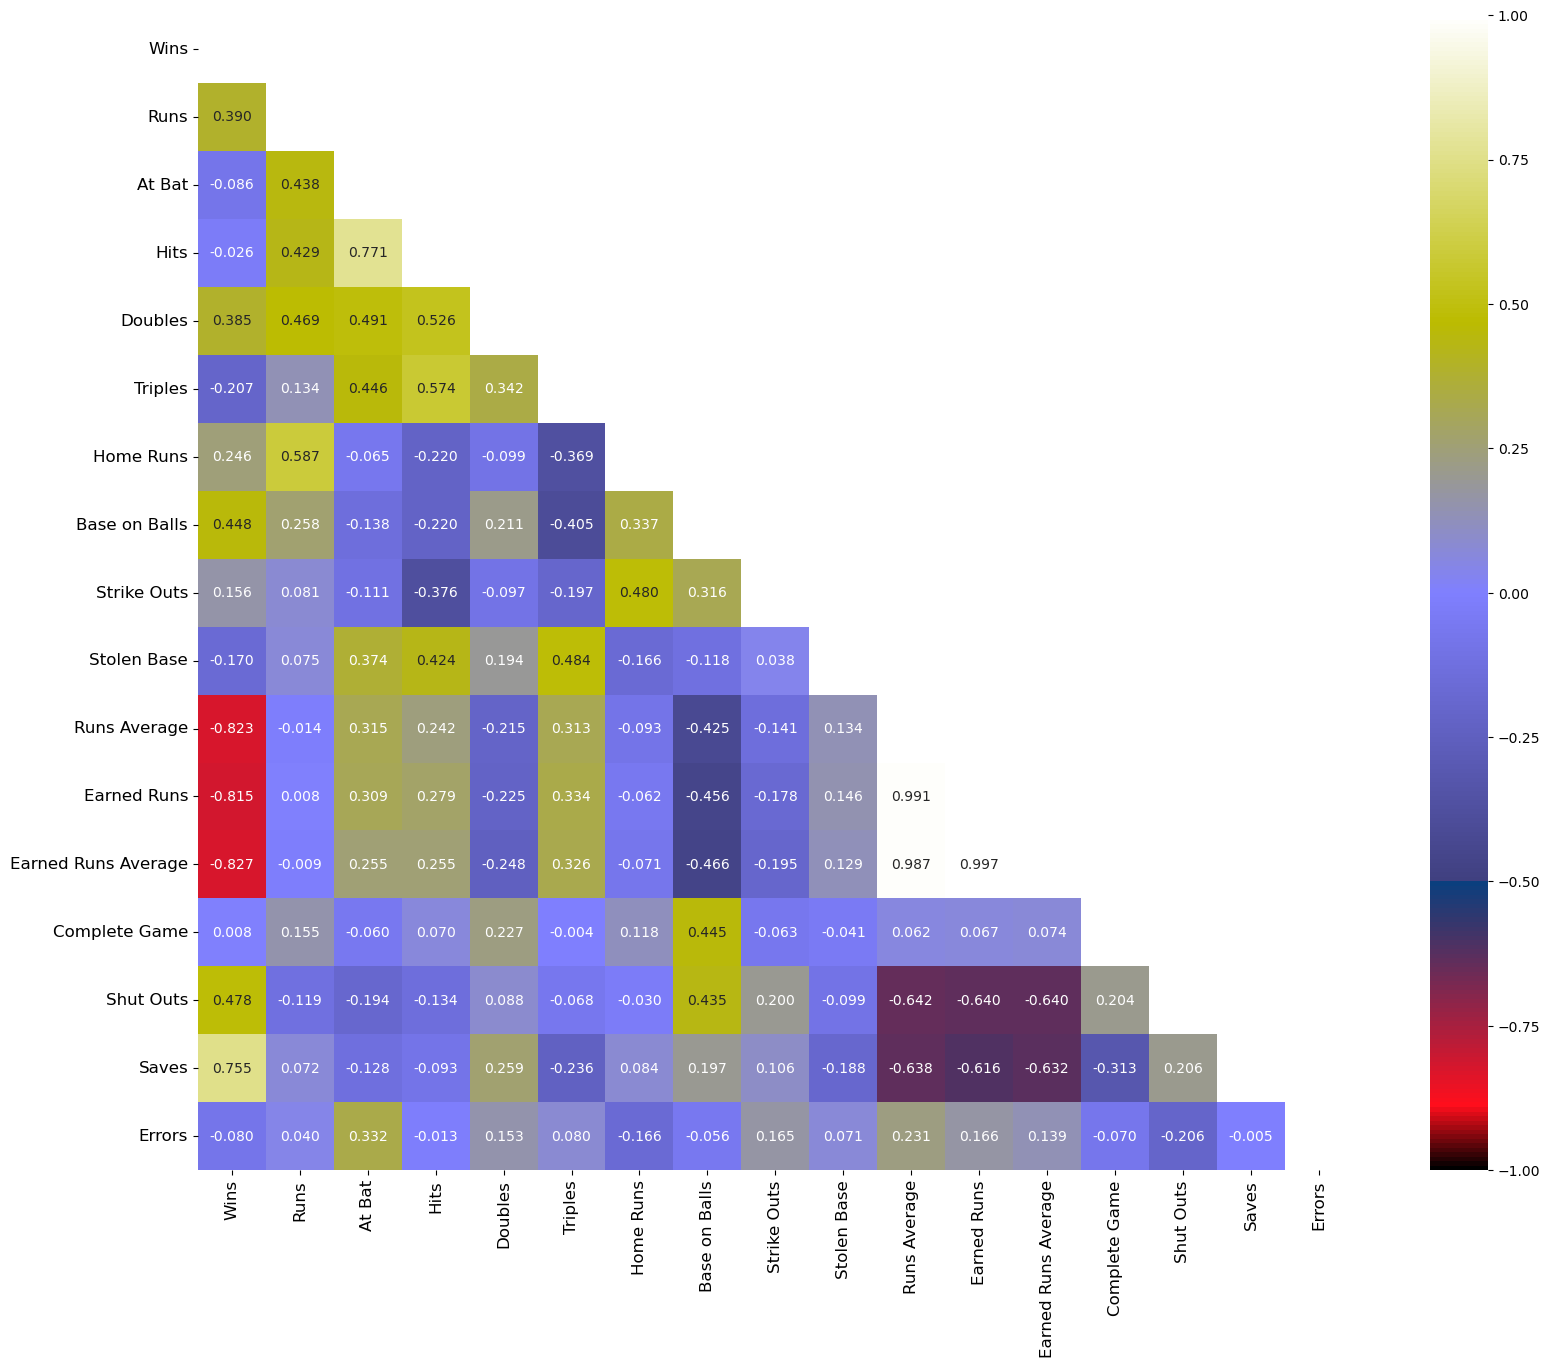

In [76]:
upper_triangle = np.triu(dataf.corr())
plt.figure(figsize=(20,15))
sns.heatmap(dataf1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# Correlation of given features with target variables

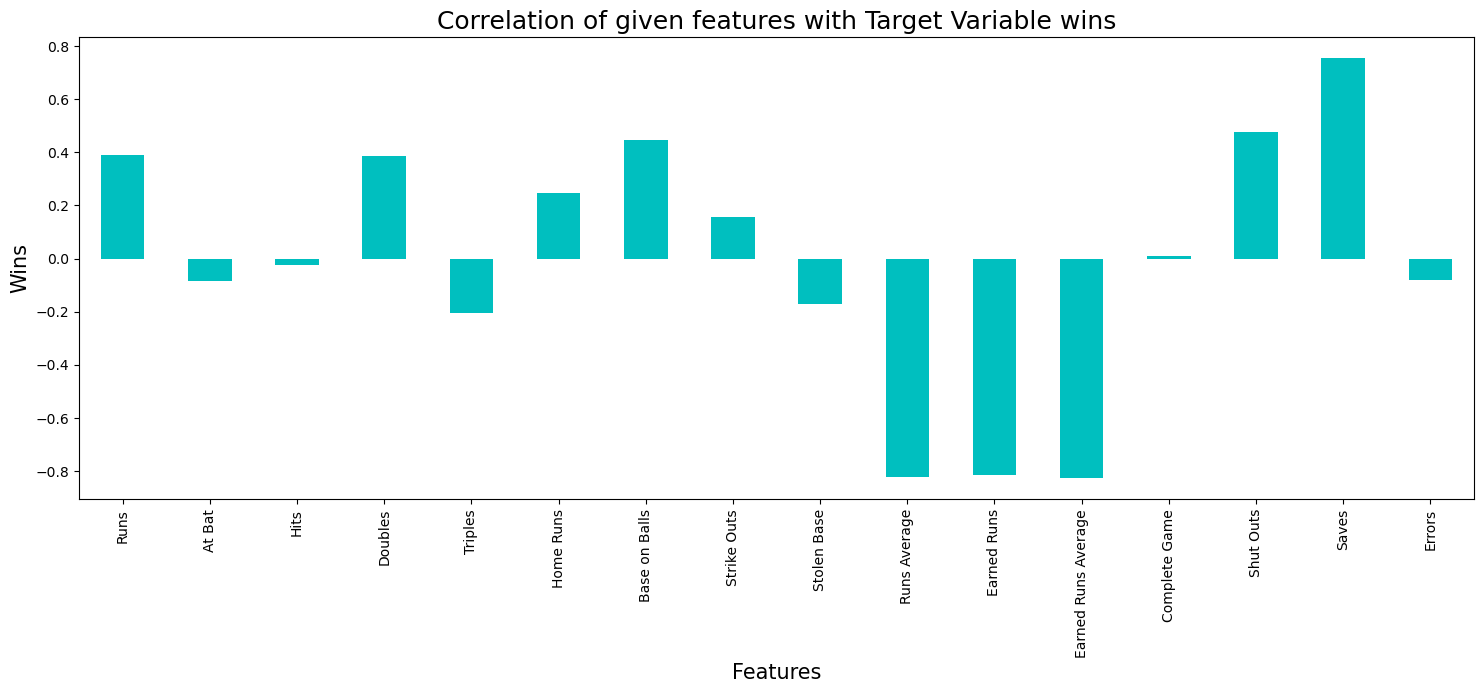

In [77]:
plt.figure(figsize = (18,6))
dataf1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of given features with Target Variable wins',fontsize = 18)
plt.show()

# Observations
1.Hits, At bats, Complete game and errors are very inadequately correlated with target variable.
2.Saves, EA, ERA,RA,  are strongly correlated with target variable.
3.The feature columns "Earned Runs," "Earned Run Average," and "Runs Average" may be seen to have many colinearities. We should check this.

# Standard Scaling

In [79]:
X=dataf1.drop(columns =['Wins'])
Y=dataf1['Wins']

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Utlising PCA

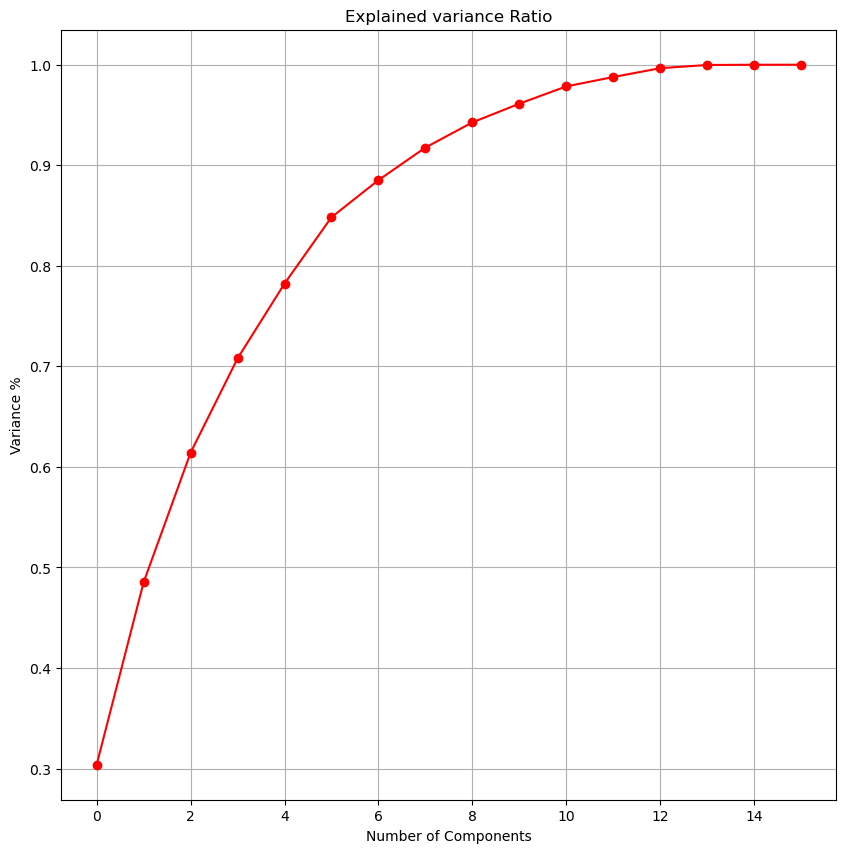

In [81]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

According to the graph, 7 main components account for 95% of the variation in the data. We'll choose the first seven factors to include in our prediction.

In [82]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [83]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

# Checking Multicollinearity Again

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2
3  1.0         3
4  1.0         4
5  1.0         5
6  1.0         6

Now we observe that the multicollinearity issue is resolved. Let's move on to Model Building

# Building ML Model

In [85]:
#Importing Important libraries for the process
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


Selecting the best random state

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851042 on Random_state 217


# Linear Regression

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


# LR Evaluation Matrix

In [89]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648205
Mean squared error : 8.560199512884212
Root Mean Squared Error: 2.925781863516864


 R2 Score :
0.9179738330851042


# Finding best n_neighbors for KNN 

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


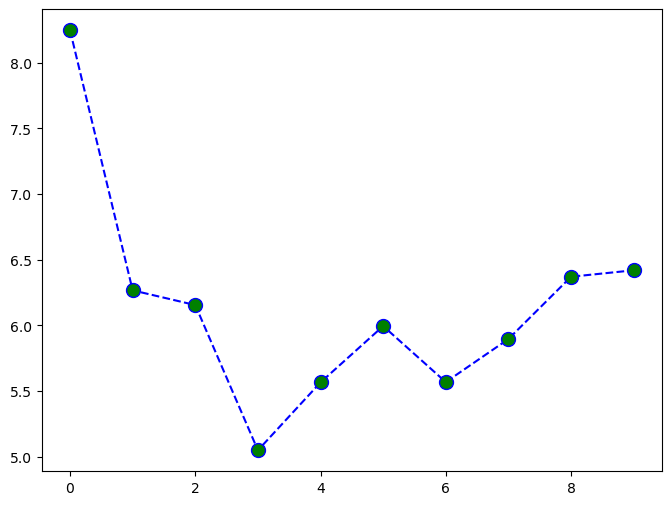

In [92]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

# Applying other Regression Model, Evaluation & Crossvalidation


In [95]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators = 250 ,max_depth=6)
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
xgb=XGBRegressor()
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print("***********************************************************************************************************")



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.67283928571428
Mean squared error : 34.07687981191603
Root Mean Squared Error: 5.83754056190756


 R2 Score :
0.6734660416285931


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.22875045240441358
***********************************************************************************************************


 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 2.516268968257969
Mean squared error : 8.448615218482999
Root Mean Squared Error: 2.906650171328328


 R2 Score :
0.9190430642337308


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.6710873546839929
***********************************************************************************************************


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 2.571235055189419
Mean squared e

# We need to find the maximum value
By observing the data lasso is giving out the maximum R2 Score which is equal to 91.90%

Applying Hyperparameter Tuning to it



 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


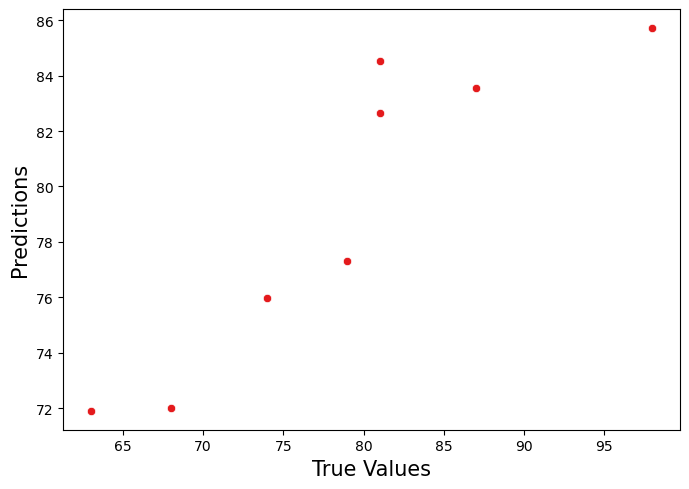





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


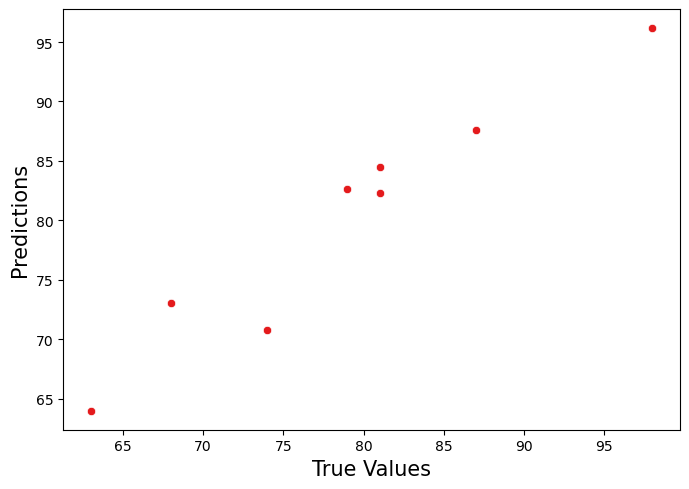





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


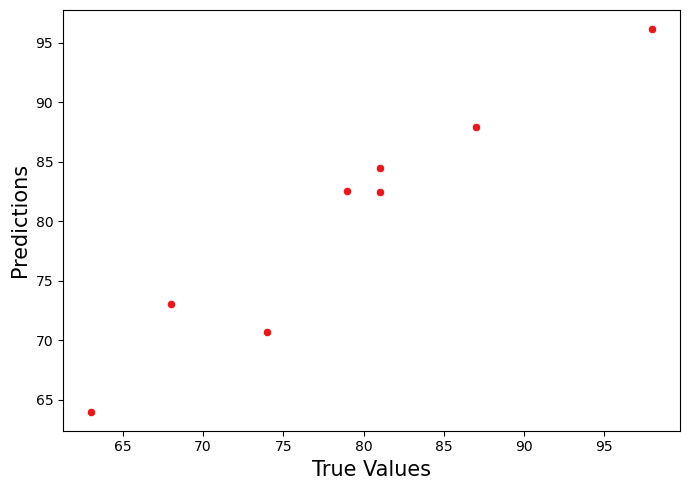





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


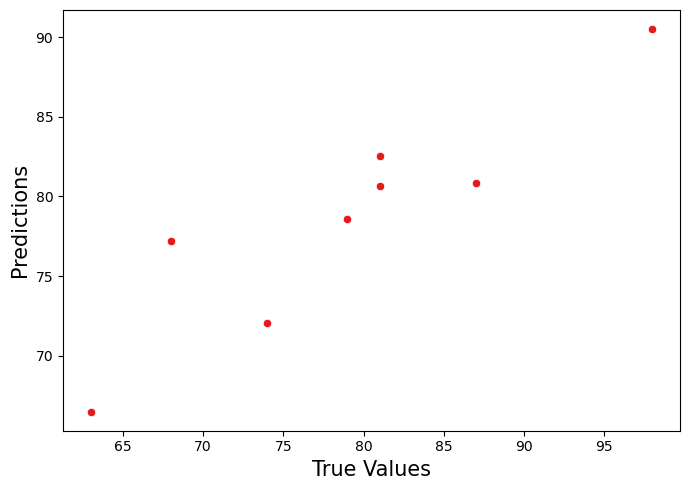





 True Values Vs Predicted Value plot DecisionTreeRegressor(criterion='mse') :


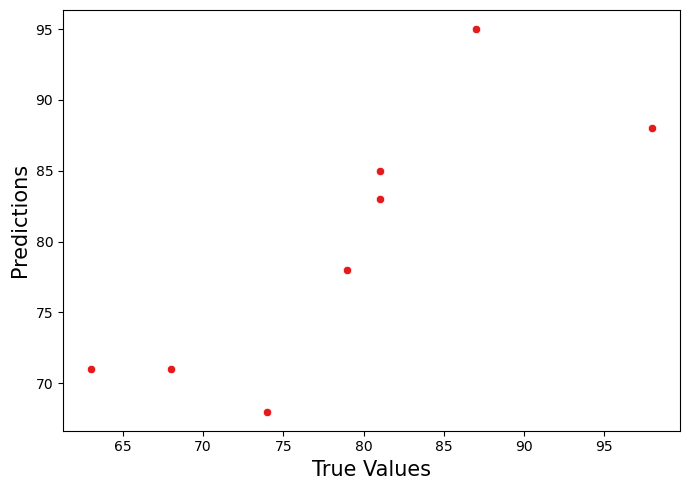





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


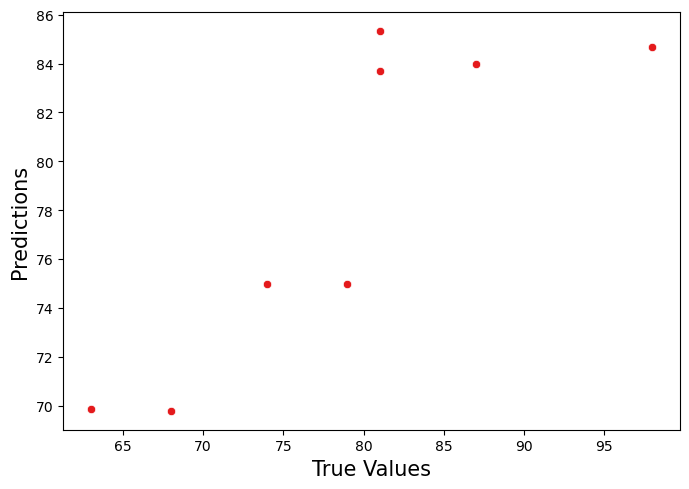





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


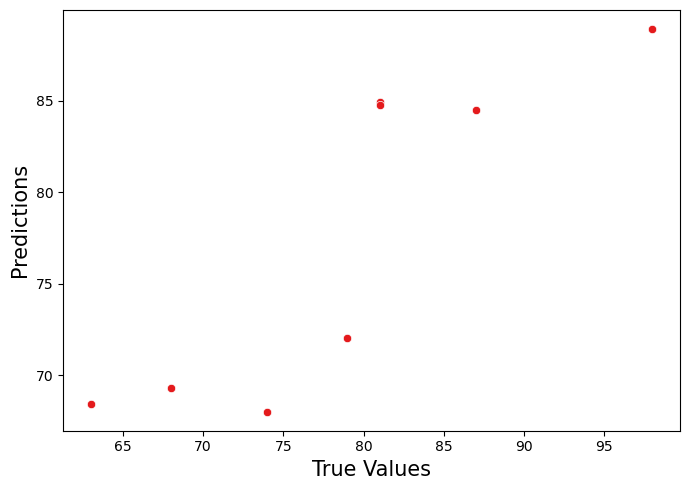





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


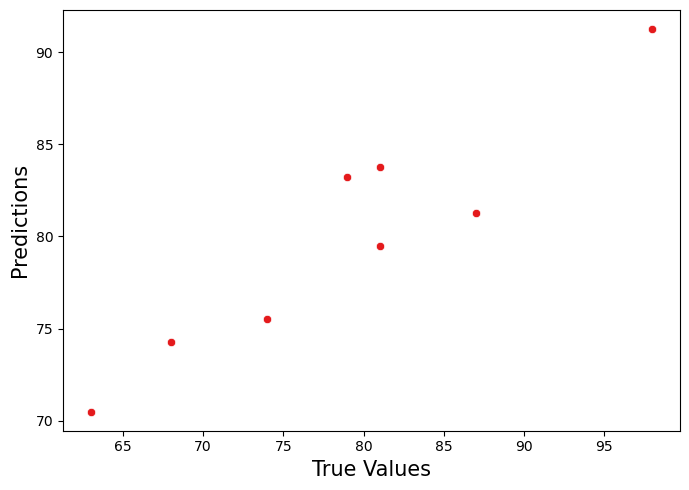





 True Values Vs Predicted Value plot XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) :


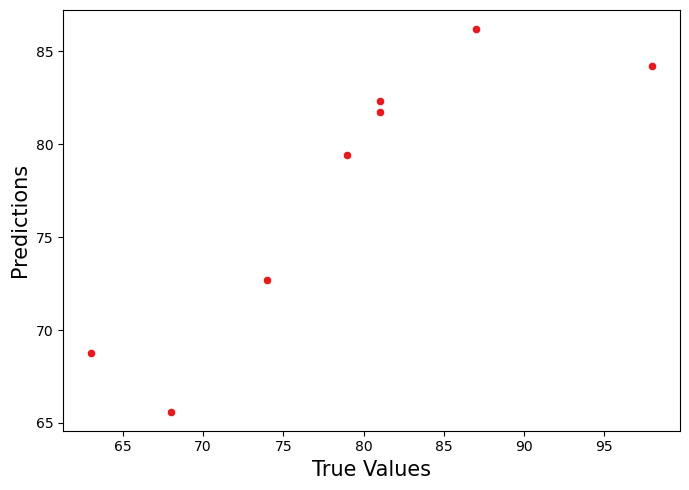

In [96]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')

Hyper Parameter Tuning Using GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

# Let's Build the final model

In [98]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.6888055239454136
Mean squared error : 9.617386970550859
Root Mean Squared Error: 3.101191217992025


 R2 Score of Final Model :
0.9078435744699423




R2 Score of the Final Model is 90.78%.Which is Satisfactory